In [180]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import pandas as pd
import seaborn as sns
from images_segmentation import otsu as ot
from images_segmentation import dicescore as dsc
from images_segmentation import preprocessing as pp


Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Preprocessing - Boxplot

def dataset_boxplot(data , title , plot = True):
    
    fig_1 = plt.figure(figsize = (14 , 10))
    ax = fig_1.add_axes([0 , 0 , 1 , 1])
    ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Median filter and \n histogram stretching' , 'Histogram stretching and \n median filter' , 'Gaussian filter and \n histogram stretching' , 'Histogram stretching and \n gaussian filter'])
    plt.title(title , size = 18)
    plt.ylabel('Preprocessing methods' , size = 14)
    plt.xlabel('Dice score' , size = 14)


    bp = ax.boxplot(data, patch_artist = True , showmeans = True , meanline = True , meanprops = dict(color = "white" , linewidth = 1.5))
    colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']
   
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    for median in bp['medians']:
        median.set(color = 'black' , linewidth = 1)
    
    plt.legend([bp["medians"][0]] , ["median"] , loc = 'lower right')

In [181]:
# Set ground truth images from N2DH-GOWT1 dataset and N2DL-HeLa dataset to 0 and 1

def reassign(x):
    img = x.copy()

    for o in np.ndindex(img.shape):
        if img[o] > 0: 
           img[o] = 1
        else:
            img[o] = 0
    
    return img

In [182]:
# Preprocessing - Histogram stretching

def stretch(x):
    intensities = []
   
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(x, (2,  98))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
   
    img_max = max(intensities)
    img_min = min(intensities)
    img_stretch = (img-img_min)*(256 / (img_max-img_min))
    return img_stretch

In [183]:
# Load raw images from N2DH-GOWT1-dataset

img_N2DH_GOWT1_1 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t01.tif")
img_N2DH_GOWT1_2 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t21.tif")
img_N2DH_GOWT1_3 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t31.tif")
img_N2DH_GOWT1_4 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t39.tif")
img_N2DH_GOWT1_5 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t52.tif")
img_N2DH_GOWT1_6 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t72.tif")


# Load ground truth images from N2DH-GOWT1-dataset

gt_N2DH_GOWT1_1 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg01.tif")
gt_N2DH_GOWT1_2 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg21.tif")
gt_N2DH_GOWT1_3 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg31.tif")
gt_N2DH_GOWT1_4 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg39.tif")
gt_N2DH_GOWT1_5 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg52.tif")
gt_N2DH_GOWT1_6 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg72.tif")


In [184]:
# Load raw images from N2DL-HeLa-dataset

img_N2DL_HeLa_1 = imread(r"data/Otsu_data/N2DL-HeLa/img/t13.tif")
img_N2DL_HeLa_2 = imread(r"data/Otsu_data/N2DL-HeLa/img/t52.tif")
img_N2DL_HeLa_3 = imread(r"data/Otsu_data/N2DL-HeLa/img/t75.tif")
img_N2DL_HeLa_4 = imread(r"data/Otsu_data/N2DL-HeLa/img/t79.tif")


# Load ground truth images from N2Dl-HeLa-dataset

gt_N2DL_HeLa_1 = imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg13.tif")
gt_N2DL_HeLa_2 = imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg52.tif")
gt_N2DL_HeLa_3 = imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg75.tif")
gt_N2DL_HeLa_4 = imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg79.tif")

In [185]:
# Load raw images of NIH3T3-dataset

img_NIH3T3_1 = imread(r"data/Otsu_data/NIH3T3/img/dna-0.png")
img_NIH3T3_2 = imread(r"data/Otsu_data/NIH3T3/img/dna-1.png")
img_NIH3T3_3 = imread(r"data/Otsu_data/NIH3T3/img/dna-26.png")
img_NIH3T3_4 = imread(r"data/Otsu_data/NIH3T3/img/dna-27.png")
img_NIH3T3_5 = imread(r"data/Otsu_data/NIH3T3/img/dna-28.png")
img_NIH3T3_6 = imread(r"data/Otsu_data/NIH3T3/img/dna-29.png")
img_NIH3T3_7 = imread(r"data/Otsu_data/NIH3T3/img/dna-30.png")
img_NIH3T3_8 = imread(r"data/Otsu_data/NIH3T3/img/dna-31.png")
img_NIH3T3_9 = imread(r"data/Otsu_data/NIH3T3/img/dna-32.png")
img_NIH3T3_10 = imread(r"data/Otsu_data/NIH3T3/img/dna-33.png")
img_NIH3T3_11 = imread(r"data/Otsu_data/NIH3T3/img/dna-37.png")
img_NIH3T3_12 = imread(r"data/Otsu_data/NIH3T3/img/dna-40.png")
img_NIH3T3_13 = imread(r"data/Otsu_data/NIH3T3/img/dna-42.png")
img_NIH3T3_14 = imread(r"data/Otsu_data/NIH3T3/img/dna-44.png")
img_NIH3T3_15 = imread(r"data/Otsu_data/NIH3T3/img/dna-45.png")
img_NIH3T3_16 = imread(r"data/Otsu_data/NIH3T3/img/dna-46.png")
img_NIH3T3_17 = imread(r"data/Otsu_data/NIH3T3/img/dna-47.png")
img_NIH3T3_18 = imread(r"data/Otsu_data/NIH3T3/img/dna-49.png")

# Load ground truth images of NIH3T3-dataset
 
gt_NIH3T3_1 = imread(r"data/Otsu_data/NIH3T3/gt/0.png")
gt_NIH3T3_2 = imread(r"data/Otsu_data/NIH3T3/gt/1.png")
gt_NIH3T3_3 = imread(r"data/Otsu_data/NIH3T3/gt/26.png")
gt_NIH3T3_4 = imread(r"data/Otsu_data/NIH3T3/gt/27.png")
gt_NIH3T3_5 = imread(r"data/Otsu_data/NIH3T3/gt/28.png")
gt_NIH3T3_6 = imread(r"data/Otsu_data/NIH3T3/gt/29.png")
gt_NIH3T3_7 = imread(r"data/Otsu_data/NIH3T3/gt/30.png")
gt_NIH3T3_8 = imread(r"data/Otsu_data/NIH3T3/gt/31.png")
gt_NIH3T3_9 = imread(r"data/Otsu_data/NIH3T3/gt/32.png")
gt_NIH3T3_10 = imread(r"data/Otsu_data/NIH3T3/gt/33.png")
gt_NIH3T3_11 = imread(r"data/Otsu_data/NIH3T3/gt/37.png")
gt_NIH3T3_12 = imread(r"data/Otsu_data/NIH3T3/gt/40.png")
gt_NIH3T3_13 = imread(r"data/Otsu_data/NIH3T3/gt/42.png")
gt_NIH3T3_14 = imread(r"data/Otsu_data/NIH3T3/gt/44.png")
gt_NIH3T3_15 = imread(r"data/Otsu_data/NIH3T3/gt/45.png")
gt_NIH3T3_16 = imread(r"data/Otsu_data/NIH3T3/gt/46.png")
gt_NIH3T3_17 = imread(r"data/Otsu_data/NIH3T3/gt/47.png")
gt_NIH3T3_18 = imread(r"data/Otsu_data/NIH3T3/gt/49.png")

In [186]:
# Reassign the ground truth images from N2DH-GOWT1 dataset and N2DLHeLa dataset

binary_gt_N2DH_GOWT1_1 = reassign(gt_N2DH_GOWT1_1)
binary_gt_N2DH_GOWT1_2 = reassign(gt_N2DH_GOWT1_2)
binary_gt_N2DH_GOWT1_3 = reassign(gt_N2DH_GOWT1_3)
binary_gt_N2DH_GOWT1_4 = reassign(gt_N2DH_GOWT1_4)
binary_gt_N2DH_GOWT1_5 = reassign(gt_N2DH_GOWT1_5)
binary_gt_N2DH_GOWT1_6 = reassign(gt_N2DH_GOWT1_6)

binary_gt_N2DL_HeLa_1 = reassign(gt_N2DL_HeLa_1)
binary_gt_N2DL_HeLa_2 = reassign(gt_N2DL_HeLa_2)
binary_gt_N2DL_HeLa_3 = reassign(gt_N2DL_HeLa_3)
binary_gt_N2DL_HeLa_4 = reassign(gt_N2DL_HeLa_4)

In [187]:
# Make a copy of all images of each dataset / use as "no preprocessed images"

copy_img_N2DH_GOWT1_1 = img_N2DH_GOWT1_1.copy()
copy_img_N2DH_GOWT1_2 = img_N2DH_GOWT1_2.copy()
copy_img_N2DH_GOWT1_3 = img_N2DH_GOWT1_3.copy()
copy_img_N2DH_GOWT1_4 = img_N2DH_GOWT1_4.copy()
copy_img_N2DH_GOWT1_5 = img_N2DH_GOWT1_5.copy()
copy_img_N2DH_GOWT1_6 = img_N2DH_GOWT1_6.copy()


copy_img_N2DL_HeLa_1 = img_N2DL_HeLa_1.copy()
copy_img_N2DL_HeLa_2 = img_N2DL_HeLa_2.copy()
copy_img_N2DL_HeLa_3 = img_N2DL_HeLa_3.copy()
copy_img_N2DL_HeLa_4 = img_N2DL_HeLa_4.copy()


copy_img_NIH3T3_1 = img_NIH3T3_1.copy()
copy_img_NIH3T3_2 = img_NIH3T3_2.copy()
copy_img_NIH3T3_3 = img_NIH3T3_3.copy()
copy_img_NIH3T3_4 = img_NIH3T3_4.copy()
copy_img_NIH3T3_5 = img_NIH3T3_5.copy()
copy_img_NIH3T3_6 = img_NIH3T3_6.copy()
copy_img_NIH3T3_7 = img_NIH3T3_7.copy()
copy_img_NIH3T3_8 = img_NIH3T3_8.copy()
copy_img_NIH3T3_9 = img_NIH3T3_9.copy()
copy_img_NIH3T3_10 = img_NIH3T3_10.copy()
copy_img_NIH3T3_11 = img_NIH3T3_11.copy()
copy_img_NIH3T3_12 = img_NIH3T3_12.copy()
copy_img_NIH3T3_13 = img_NIH3T3_13.copy()
copy_img_NIH3T3_14 = img_NIH3T3_14.copy()
copy_img_NIH3T3_15 = img_NIH3T3_15.copy()
copy_img_NIH3T3_16 = img_NIH3T3_16.copy()
copy_img_NIH3T3_17 = img_NIH3T3_17.copy()
copy_img_NIH3T3_18 = img_NIH3T3_18.copy()

In [188]:
# Apply median filter to all images of each dataset

median_img_N2DH_GOWT1_1 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_1, 5)
median_img_N2DH_GOWT1_2 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_2, 5)
median_img_N2DH_GOWT1_3 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_3, 5)
median_img_N2DH_GOWT1_4 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_4, 5)
median_img_N2DH_GOWT1_5 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_5, 5)
median_img_N2DH_GOWT1_6 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_6, 5)


median_img_N2DL_HeLa_1 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_1, 5)
median_img_N2DL_HeLa_2 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_2, 5)
median_img_N2DL_HeLa_3 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_3, 5)
median_img_N2DL_HeLa_4 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_4, 5)


median_img_NIH3T3_1 = scipy.ndimage.median_filter(copy_img_NIH3T3_1, 5)
median_img_NIH3T3_2 = scipy.ndimage.median_filter(copy_img_NIH3T3_2, 5)
median_img_NIH3T3_3 = scipy.ndimage.median_filter(copy_img_NIH3T3_3, 5)
median_img_NIH3T3_4 = scipy.ndimage.median_filter(copy_img_NIH3T3_4, 5)
median_img_NIH3T3_5 = scipy.ndimage.median_filter(copy_img_NIH3T3_5, 5)
median_img_NIH3T3_6 = scipy.ndimage.median_filter(copy_img_NIH3T3_6, 5)
median_img_NIH3T3_7 = scipy.ndimage.median_filter(copy_img_NIH3T3_7, 5)
median_img_NIH3T3_8 = scipy.ndimage.median_filter(copy_img_NIH3T3_8, 5)
median_img_NIH3T3_9 = scipy.ndimage.median_filter(copy_img_NIH3T3_9, 5)
median_img_NIH3T3_10 = scipy.ndimage.median_filter(copy_img_NIH3T3_10, 5)
median_img_NIH3T3_11 = scipy.ndimage.median_filter(copy_img_NIH3T3_11, 5)
median_img_NIH3T3_12 = scipy.ndimage.median_filter(copy_img_NIH3T3_12, 5)
median_img_NIH3T3_13 = scipy.ndimage.median_filter(copy_img_NIH3T3_13, 5)
median_img_NIH3T3_14 = scipy.ndimage.median_filter(copy_img_NIH3T3_14, 5)
median_img_NIH3T3_15 = scipy.ndimage.median_filter(copy_img_NIH3T3_15, 5)
median_img_NIH3T3_16 = scipy.ndimage.median_filter(copy_img_NIH3T3_16, 5)
median_img_NIH3T3_17 = scipy.ndimage.median_filter(copy_img_NIH3T3_17, 5)
median_img_NIH3T3_18 = scipy.ndimage.median_filter(copy_img_NIH3T3_18, 5)


In [189]:
# Apply gaussian filter to all images of each dataset

gauss_img_N2DH_GOWT1_1 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_1, 5)
gauss_img_N2DH_GOWT1_2 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_2, 5)
gauss_img_N2DH_GOWT1_3 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_3, 5)
gauss_img_N2DH_GOWT1_4 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_4, 5)
gauss_img_N2DH_GOWT1_5 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_5, 5)
gauss_img_N2DH_GOWT1_6 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_6, 5)


gauss_img_N2DL_HeLa_1 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_1, 5)
gauss_img_N2DL_HeLa_2 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_2, 5)
gauss_img_N2DL_HeLa_3 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_3, 5)
gauss_img_N2DL_HeLa_4 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_4, 5)


gauss_img_NIH3T3_1 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_1, 5)
gauss_img_NIH3T3_2 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_2, 5)
gauss_img_NIH3T3_3 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_3, 5)
gauss_img_NIH3T3_4 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_4, 5)
gauss_img_NIH3T3_5 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_5, 5)
gauss_img_NIH3T3_6 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_6, 5)
gauss_img_NIH3T3_7 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_7, 5)
gauss_img_NIH3T3_8 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_8, 5)
gauss_img_NIH3T3_9 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_9, 5)
gauss_img_NIH3T3_10 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_10, 5)
gauss_img_NIH3T3_11 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_11, 5)
gauss_img_NIH3T3_12 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_12, 5)
gauss_img_NIH3T3_13 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_13, 5)
gauss_img_NIH3T3_14 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_14, 5)
gauss_img_NIH3T3_15 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_15, 5)
gauss_img_NIH3T3_16 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_16, 5)
gauss_img_NIH3T3_17 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_17, 5)
gauss_img_NIH3T3_18 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_18, 5)

In [190]:
# Apply histogram stretching to all images of each dataset

stretch_img_N2DH_GOWT1_1 = stretch(copy_img_N2DH_GOWT1_1)
stretch_img_N2DH_GOWT1_2 = stretch(copy_img_N2DH_GOWT1_2)
stretch_img_N2DH_GOWT1_3 = stretch(copy_img_N2DH_GOWT1_3)
stretch_img_N2DH_GOWT1_4 = stretch(copy_img_N2DH_GOWT1_4)
stretch_img_N2DH_GOWT1_5 = stretch(copy_img_N2DH_GOWT1_5)
stretch_img_N2DH_GOWT1_6 = stretch(copy_img_N2DH_GOWT1_6)


stretch_img_N2DL_HeLa_1 = stretch(copy_img_N2DL_HeLa_1)
stretch_img_N2DL_HeLa_2 = stretch(copy_img_N2DL_HeLa_2)
stretch_img_N2DL_HeLa_3 = stretch(copy_img_N2DL_HeLa_3)
stretch_img_N2DL_HeLa_4 = stretch(copy_img_N2DL_HeLa_4)


stretch_img_NIH3T3_1 = stretch(copy_img_NIH3T3_1)
stretch_img_NIH3T3_2 = stretch(copy_img_NIH3T3_2)
stretch_img_NIH3T3_3 = stretch(copy_img_NIH3T3_3)
stretch_img_NIH3T3_4 = stretch(copy_img_NIH3T3_4)
stretch_img_NIH3T3_5 = stretch(copy_img_NIH3T3_5)
stretch_img_NIH3T3_6 = stretch(copy_img_NIH3T3_6)
stretch_img_NIH3T3_7 = stretch(copy_img_NIH3T3_7)
stretch_img_NIH3T3_8 = stretch(copy_img_NIH3T3_8)
stretch_img_NIH3T3_9 = stretch(copy_img_NIH3T3_9)
stretch_img_NIH3T3_10 = stretch(copy_img_NIH3T3_10)
stretch_img_NIH3T3_11 = stretch(copy_img_NIH3T3_11)
stretch_img_NIH3T3_12 = stretch(copy_img_NIH3T3_12)
stretch_img_NIH3T3_13 = stretch(copy_img_NIH3T3_13)
stretch_img_NIH3T3_14 = stretch(copy_img_NIH3T3_14)
stretch_img_NIH3T3_15 = stretch(copy_img_NIH3T3_15)
stretch_img_NIH3T3_16 = stretch(copy_img_NIH3T3_16)
stretch_img_NIH3T3_17 = stretch(copy_img_NIH3T3_17)
stretch_img_NIH3T3_18 = stretch(copy_img_NIH3T3_18)

In [191]:
# Apply median filter and histogram strechting to all images of each dataset

median_stretch_img_N2DH_GOWT1_1 = stretch(median_img_N2DH_GOWT1_1)
median_stretch_img_N2DH_GOWT1_2 = stretch(median_img_N2DH_GOWT1_2)
median_stretch_img_N2DH_GOWT1_3 = stretch(median_img_N2DH_GOWT1_3)
median_stretch_img_N2DH_GOWT1_4 = stretch(median_img_N2DH_GOWT1_4)
median_stretch_img_N2DH_GOWT1_5 = stretch(median_img_N2DH_GOWT1_5)
median_stretch_img_N2DH_GOWT1_6 = stretch(median_img_N2DH_GOWT1_6)


median_stretch_img_N2DL_HeLa_1 = stretch(median_img_N2DL_HeLa_1)
median_stretch_img_N2DL_HeLa_2 = stretch(median_img_N2DL_HeLa_2)
median_stretch_img_N2DL_HeLa_3 = stretch(median_img_N2DL_HeLa_3)
median_stretch_img_N2DL_HeLa_4 = stretch(median_img_N2DL_HeLa_4)


median_stretch_img_NIH3T3_1 = stretch(median_img_NIH3T3_1)
median_stretch_img_NIH3T3_2 = stretch(median_img_NIH3T3_2)
median_stretch_img_NIH3T3_3 = stretch(median_img_NIH3T3_3)
median_stretch_img_NIH3T3_4 = stretch(median_img_NIH3T3_4)
median_stretch_img_NIH3T3_5 = stretch(median_img_NIH3T3_5)
median_stretch_img_NIH3T3_6 = stretch(median_img_NIH3T3_6)
median_stretch_img_NIH3T3_7 = stretch(median_img_NIH3T3_7)
median_stretch_img_NIH3T3_8 = stretch(median_img_NIH3T3_8)
median_stretch_img_NIH3T3_9 = stretch(median_img_NIH3T3_9)
median_stretch_img_NIH3T3_10 = stretch(median_img_NIH3T3_10)
median_stretch_img_NIH3T3_11 = stretch(median_img_NIH3T3_11)
median_stretch_img_NIH3T3_12 = stretch(median_img_NIH3T3_12)
median_stretch_img_NIH3T3_13 = stretch(median_img_NIH3T3_13)
median_stretch_img_NIH3T3_14 = stretch(median_img_NIH3T3_14)
median_stretch_img_NIH3T3_15 = stretch(median_img_NIH3T3_15)
median_stretch_img_NIH3T3_16 = stretch(median_img_NIH3T3_16)
median_stretch_img_NIH3T3_17 = stretch(median_img_NIH3T3_17)
median_stretch_img_NIH3T3_18 = stretch(median_img_NIH3T3_18)

In [192]:
# Apply histogram stretching and median filter to all images of each dataset

stretch_median_img_N2DH_GOWT1_1 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_1, 5)
stretch_median_img_N2DH_GOWT1_2 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_2, 5)
stretch_median_img_N2DH_GOWT1_3 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_3, 5)
stretch_median_img_N2DH_GOWT1_4 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_4, 5)
stretch_median_img_N2DH_GOWT1_5 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_5, 5)
stretch_median_img_N2DH_GOWT1_6 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_6, 5)


stretch_median_img_N2DL_HeLa_1 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_1, 5)
stretch_median_img_N2DL_HeLa_2 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_2, 5)
stretch_median_img_N2DL_HeLa_3 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_3, 5)
stretch_median_img_N2DL_HeLa_4 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_4, 5)


stretch_median_img_NIH3T3_1 = scipy.ndimage.median_filter(stretch_img_NIH3T3_1, 5)
stretch_median_img_NIH3T3_2 = scipy.ndimage.median_filter(stretch_img_NIH3T3_2, 5)
stretch_median_img_NIH3T3_3 = scipy.ndimage.median_filter(stretch_img_NIH3T3_3, 5)
stretch_median_img_NIH3T3_4 = scipy.ndimage.median_filter(stretch_img_NIH3T3_4, 5)
stretch_median_img_NIH3T3_5 = scipy.ndimage.median_filter(stretch_img_NIH3T3_5, 5)
stretch_median_img_NIH3T3_6 = scipy.ndimage.median_filter(stretch_img_NIH3T3_6, 5)
stretch_median_img_NIH3T3_7 = scipy.ndimage.median_filter(stretch_img_NIH3T3_7, 5)
stretch_median_img_NIH3T3_8 = scipy.ndimage.median_filter(stretch_img_NIH3T3_8, 5)
stretch_median_img_NIH3T3_9 = scipy.ndimage.median_filter(stretch_img_NIH3T3_9, 5)
stretch_median_img_NIH3T3_10 = scipy.ndimage.median_filter(stretch_img_NIH3T3_10, 5)
stretch_median_img_NIH3T3_11 = scipy.ndimage.median_filter(stretch_img_NIH3T3_11, 5)
stretch_median_img_NIH3T3_12 = scipy.ndimage.median_filter(stretch_img_NIH3T3_12, 5)
stretch_median_img_NIH3T3_13 = scipy.ndimage.median_filter(stretch_img_NIH3T3_13, 5)
stretch_median_img_NIH3T3_14 = scipy.ndimage.median_filter(stretch_img_NIH3T3_14, 5)
stretch_median_img_NIH3T3_15 = scipy.ndimage.median_filter(stretch_img_NIH3T3_15, 5)
stretch_median_img_NIH3T3_16 = scipy.ndimage.median_filter(stretch_img_NIH3T3_16, 5)
stretch_median_img_NIH3T3_17 = scipy.ndimage.median_filter(stretch_img_NIH3T3_17, 5)
stretch_median_img_NIH3T3_18 = scipy.ndimage.median_filter(stretch_img_NIH3T3_18, 5)

In [193]:
# Apply gaussian filter and histogram strechting to all images of each dataset

gauss_stretch_img_N2DH_GOWT1_1 = stretch(gauss_img_N2DH_GOWT1_1)
gauss_stretch_img_N2DH_GOWT1_2 = stretch(gauss_img_N2DH_GOWT1_2)
gauss_stretch_img_N2DH_GOWT1_3 = stretch(gauss_img_N2DH_GOWT1_3)
gauss_stretch_img_N2DH_GOWT1_4 = stretch(gauss_img_N2DH_GOWT1_4)
gauss_stretch_img_N2DH_GOWT1_5 = stretch(gauss_img_N2DH_GOWT1_5)
gauss_stretch_img_N2DH_GOWT1_6 = stretch(gauss_img_N2DH_GOWT1_6)


gauss_stretch_img_N2DL_HeLa_1 = stretch(gauss_img_N2DL_HeLa_1)
gauss_stretch_img_N2DL_HeLa_2 = stretch(gauss_img_N2DL_HeLa_2)
gauss_stretch_img_N2DL_HeLa_3 = stretch(gauss_img_N2DL_HeLa_3)
gauss_stretch_img_N2DL_HeLa_4 = stretch(gauss_img_N2DL_HeLa_4)


gauss_stretch_img_NIH3T3_1 = stretch(gauss_img_NIH3T3_1)
gauss_stretch_img_NIH3T3_2 = stretch(gauss_img_NIH3T3_2)
gauss_stretch_img_NIH3T3_3 = stretch(gauss_img_NIH3T3_3)
gauss_stretch_img_NIH3T3_4 = stretch(gauss_img_NIH3T3_4)
gauss_stretch_img_NIH3T3_5 = stretch(gauss_img_NIH3T3_5)
gauss_stretch_img_NIH3T3_6 = stretch(gauss_img_NIH3T3_6)
gauss_stretch_img_NIH3T3_7 = stretch(gauss_img_NIH3T3_7)
gauss_stretch_img_NIH3T3_8 = stretch(gauss_img_NIH3T3_8)
gauss_stretch_img_NIH3T3_9 = stretch(gauss_img_NIH3T3_9)
gauss_stretch_img_NIH3T3_10 = stretch(gauss_img_NIH3T3_10)
gauss_stretch_img_NIH3T3_11 = stretch(gauss_img_NIH3T3_11)
gauss_stretch_img_NIH3T3_12 = stretch(gauss_img_NIH3T3_12)
gauss_stretch_img_NIH3T3_13 = stretch(gauss_img_NIH3T3_13)
gauss_stretch_img_NIH3T3_14 = stretch(gauss_img_NIH3T3_14)
gauss_stretch_img_NIH3T3_15 = stretch(gauss_img_NIH3T3_15)
gauss_stretch_img_NIH3T3_16 = stretch(gauss_img_NIH3T3_16)
gauss_stretch_img_NIH3T3_17 = stretch(gauss_img_NIH3T3_17)
gauss_stretch_img_NIH3T3_18 = stretch(gauss_img_NIH3T3_18)

In [194]:
# Apply histogram stretching and gaussian filter to all images of each dataset

stretch_gauss_img_N2DH_GOWT1_1 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_1, 5)
stretch_gauss_img_N2DH_GOWT1_2 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_2, 5)
stretch_gauss_img_N2DH_GOWT1_3 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_3, 5)
stretch_gauss_img_N2DH_GOWT1_4 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_4, 5)
stretch_gauss_img_N2DH_GOWT1_5 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_5, 5)
stretch_gauss_img_N2DH_GOWT1_6 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_6, 5)


stretch_gauss_img_N2DL_HeLa_1 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_1, 5)
stretch_gauss_img_N2DL_HeLa_2 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_2, 5)
stretch_gauss_img_N2DL_HeLa_3 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_3, 5)
stretch_gauss_img_N2DL_HeLa_4 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_4, 5)


stretch_gauss_img_NIH3T3_1 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_1, 5)
stretch_gauss_img_NIH3T3_2 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_2, 5)
stretch_gauss_img_NIH3T3_3 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_3, 5)
stretch_gauss_img_NIH3T3_4 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_4, 5)
stretch_gauss_img_NIH3T3_5 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_5, 5)
stretch_gauss_img_NIH3T3_6 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_6, 5)
stretch_gauss_img_NIH3T3_7 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_7, 5)
stretch_gauss_img_NIH3T3_8 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_8, 5)
stretch_gauss_img_NIH3T3_9 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_9, 5)
stretch_gauss_img_NIH3T3_10 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_10, 5)
stretch_gauss_img_NIH3T3_11 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_11, 5)
stretch_gauss_img_NIH3T3_12 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_12, 5)
stretch_gauss_img_NIH3T3_13 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_13, 5)
stretch_gauss_img_NIH3T3_14 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_14, 5)
stretch_gauss_img_NIH3T3_15 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_15, 5)
stretch_gauss_img_NIH3T3_16 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_16, 5)
stretch_gauss_img_NIH3T3_17 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_17, 5)
stretch_gauss_img_NIH3T3_18 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_18, 5)

In [195]:
# Apply otsu thresholding to all images of each dataset - no preprocessing

otsu_img_N2DH_GOWT1_1 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_1 , 256)
otsu_img_N2DH_GOWT1_2 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_2 , 256)
otsu_img_N2DH_GOWT1_3 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_3 , 256)
otsu_img_N2DH_GOWT1_4 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_4 , 256)
otsu_img_N2DH_GOWT1_5 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_5 , 256)
otsu_img_N2DH_GOWT1_6 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_6 , 256)


otsu_img_N2DL_HeLa_1 = ot.otsu_thresholding(copy_img_N2DL_HeLa_1 , 256) 
otsu_img_N2DL_HeLa_2 = ot.otsu_thresholding(copy_img_N2DL_HeLa_2 , 256) 
otsu_img_N2DL_HeLa_3 = ot.otsu_thresholding(copy_img_N2DL_HeLa_3 , 256) 
otsu_img_N2DL_HeLa_4 = ot.otsu_thresholding(copy_img_N2DL_HeLa_4 , 256) 


otsu_img_NIH3T3_1 = ot.otsu_thresholding(copy_img_NIH3T3_1 , 256)
otsu_img_NIH3T3_2 = ot.otsu_thresholding(copy_img_NIH3T3_2 , 256)
otsu_img_NIH3T3_3 = ot.otsu_thresholding(copy_img_NIH3T3_3 , 256)
otsu_img_NIH3T3_4 = ot.otsu_thresholding(copy_img_NIH3T3_4 , 256)
otsu_img_NIH3T3_5 = ot.otsu_thresholding(copy_img_NIH3T3_5 , 256)
otsu_img_NIH3T3_6 = ot.otsu_thresholding(copy_img_NIH3T3_6 , 256)
otsu_img_NIH3T3_7 = ot.otsu_thresholding(copy_img_NIH3T3_7 , 256)
otsu_img_NIH3T3_8 = ot.otsu_thresholding(copy_img_NIH3T3_8 , 256)
otsu_img_NIH3T3_9 = ot.otsu_thresholding(copy_img_NIH3T3_9 , 256)
otsu_img_NIH3T3_10 = ot.otsu_thresholding(copy_img_NIH3T3_10 , 256)
otsu_img_NIH3T3_11 = ot.otsu_thresholding(copy_img_NIH3T3_11 , 256)
otsu_img_NIH3T3_12 = ot.otsu_thresholding(copy_img_NIH3T3_12 , 256)
otsu_img_NIH3T3_13 = ot.otsu_thresholding(copy_img_NIH3T3_13 , 256)
otsu_img_NIH3T3_14 = ot.otsu_thresholding(copy_img_NIH3T3_14 , 256)
otsu_img_NIH3T3_15 = ot.otsu_thresholding(copy_img_NIH3T3_15 , 256)
otsu_img_NIH3T3_16 = ot.otsu_thresholding(copy_img_NIH3T3_16 , 256)
otsu_img_NIH3T3_17 = ot.otsu_thresholding(copy_img_NIH3T3_17 , 256)
otsu_img_NIH3T3_18 = ot.otsu_thresholding(copy_img_NIH3T3_18 , 256)

In [196]:
# Apply otsu thresholding to all images of each dataset - median filter

otsu_median_img_N2DH_GOWT1_1 = ot.otsu_thresholding(median_img_N2DH_GOWT1_1 , 256)
otsu_median_img_N2DH_GOWT1_2 = ot.otsu_thresholding(median_img_N2DH_GOWT1_2 , 256)
otsu_median_img_N2DH_GOWT1_3 = ot.otsu_thresholding(median_img_N2DH_GOWT1_3 , 256)
otsu_median_img_N2DH_GOWT1_4 = ot.otsu_thresholding(median_img_N2DH_GOWT1_4 , 256)
otsu_median_img_N2DH_GOWT1_5 = ot.otsu_thresholding(median_img_N2DH_GOWT1_5 , 256)
otsu_median_img_N2DH_GOWT1_6 = ot.otsu_thresholding(median_img_N2DH_GOWT1_6 , 256)


otsu_median_img_N2DL_HeLa_1 = ot.otsu_thresholding(median_img_N2DL_HeLa_1 , 256) 
otsu_median_img_N2DL_HeLa_2 = ot.otsu_thresholding(median_img_N2DL_HeLa_2 , 256) 
otsu_median_img_N2DL_HeLa_3 = ot.otsu_thresholding(median_img_N2DL_HeLa_3 , 256) 
otsu_median_img_N2DL_HeLa_4 = ot.otsu_thresholding(median_img_N2DL_HeLa_4 , 256) 


otsu_median_img_NIH3T3_1 = ot.otsu_thresholding(median_img_NIH3T3_1 , 256)
otsu_median_img_NIH3T3_2 = ot.otsu_thresholding(median_img_NIH3T3_2 , 256)
otsu_median_img_NIH3T3_3 = ot.otsu_thresholding(median_img_NIH3T3_3 , 256)
otsu_median_img_NIH3T3_4 = ot.otsu_thresholding(median_img_NIH3T3_4 , 256)
otsu_median_img_NIH3T3_5 = ot.otsu_thresholding(median_img_NIH3T3_5 , 256)
otsu_median_img_NIH3T3_6 = ot.otsu_thresholding(median_img_NIH3T3_6 , 256)
otsu_median_img_NIH3T3_7 = ot.otsu_thresholding(median_img_NIH3T3_7 , 256)
otsu_median_img_NIH3T3_8 = ot.otsu_thresholding(median_img_NIH3T3_8 , 256)
otsu_median_img_NIH3T3_9 = ot.otsu_thresholding(median_img_NIH3T3_9 , 256)
otsu_median_img_NIH3T3_10 = ot.otsu_thresholding(median_img_NIH3T3_10 , 256)
otsu_median_img_NIH3T3_11 = ot.otsu_thresholding(median_img_NIH3T3_11 , 256)
otsu_median_img_NIH3T3_12 = ot.otsu_thresholding(median_img_NIH3T3_12 , 256)
otsu_median_img_NIH3T3_13 = ot.otsu_thresholding(median_img_NIH3T3_13 , 256)
otsu_median_img_NIH3T3_14 = ot.otsu_thresholding(median_img_NIH3T3_14 , 256)
otsu_median_img_NIH3T3_15 = ot.otsu_thresholding(median_img_NIH3T3_15 , 256)
otsu_median_img_NIH3T3_16 = ot.otsu_thresholding(median_img_NIH3T3_16 , 256)
otsu_median_img_NIH3T3_17 = ot.otsu_thresholding(median_img_NIH3T3_17 , 256)
otsu_median_img_NIH3T3_18 = ot.otsu_thresholding(median_img_NIH3T3_18 , 256)

In [197]:
# Apply otsu thresholding to all images of each dataset - gaussian filter
otsu_gauss_img_N2DH_GOWT1_1 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_1 , 256)
otsu_gauss_img_N2DH_GOWT1_2 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_2 , 256)
otsu_gauss_img_N2DH_GOWT1_3 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_3 , 256)
otsu_gauss_img_N2DH_GOWT1_4 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_4 , 256)
otsu_gauss_img_N2DH_GOWT1_5 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_5 , 256)
otsu_gauss_img_N2DH_GOWT1_6 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_6 , 256)


otsu_gauss_img_N2DL_HeLa_1 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_1 , 256) 
otsu_gauss_img_N2DL_HeLa_2 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_2 , 256) 
otsu_gauss_img_N2DL_HeLa_3 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_3 , 256) 
otsu_gauss_img_N2DL_HeLa_4 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_4 , 256) 


otsu_gauss_img_NIH3T3_1 = ot.otsu_thresholding(gauss_img_NIH3T3_1 , 256)
otsu_gauss_img_NIH3T3_2 = ot.otsu_thresholding(gauss_img_NIH3T3_2 , 256)
otsu_gauss_img_NIH3T3_3 = ot.otsu_thresholding(gauss_img_NIH3T3_3 , 256)
otsu_gauss_img_NIH3T3_4 = ot.otsu_thresholding(gauss_img_NIH3T3_4 , 256)
otsu_gauss_img_NIH3T3_5 = ot.otsu_thresholding(gauss_img_NIH3T3_5 , 256)
otsu_gauss_img_NIH3T3_6 = ot.otsu_thresholding(gauss_img_NIH3T3_6 , 256)
otsu_gauss_img_NIH3T3_7 = ot.otsu_thresholding(gauss_img_NIH3T3_7 , 256)
otsu_gauss_img_NIH3T3_8 = ot.otsu_thresholding(gauss_img_NIH3T3_8 , 256)
otsu_gauss_img_NIH3T3_9 = ot.otsu_thresholding(gauss_img_NIH3T3_9 , 256)
otsu_gauss_img_NIH3T3_10 = ot.otsu_thresholding(gauss_img_NIH3T3_10 , 256)
otsu_gauss_img_NIH3T3_11 = ot.otsu_thresholding(gauss_img_NIH3T3_11 , 256)
otsu_gauss_img_NIH3T3_12 = ot.otsu_thresholding(gauss_img_NIH3T3_12 , 256)
otsu_gauss_img_NIH3T3_13 = ot.otsu_thresholding(gauss_img_NIH3T3_13 , 256)
otsu_gauss_img_NIH3T3_14 = ot.otsu_thresholding(gauss_img_NIH3T3_14 , 256)
otsu_gauss_img_NIH3T3_15 = ot.otsu_thresholding(gauss_img_NIH3T3_15 , 256)
otsu_gauss_img_NIH3T3_16 = ot.otsu_thresholding(gauss_img_NIH3T3_16 , 256)
otsu_gauss_img_NIH3T3_17 = ot.otsu_thresholding(gauss_img_NIH3T3_17 , 256)
otsu_gauss_img_NIH3T3_18 = ot.otsu_thresholding(gauss_img_NIH3T3_18 , 256)


In [198]:
# Apply otsu thresholding to all images of each dataset - histogram stretching
otsu_stretch_img_N2DH_GOWT1_1 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_1 , 256)
otsu_stretch_img_N2DH_GOWT1_2 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_2 , 256)
otsu_stretch_img_N2DH_GOWT1_3 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_3 , 256)
otsu_stretch_img_N2DH_GOWT1_4 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_4 , 256)
otsu_stretch_img_N2DH_GOWT1_5 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_5 , 256)
otsu_stretch_img_N2DH_GOWT1_6 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_6 , 256)


otsu_stretch_img_N2DL_HeLa_1 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_1 , 256) 
otsu_stretch_img_N2DL_HeLa_2 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_2 , 256) 
otsu_stretch_img_N2DL_HeLa_3 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_3 , 256) 
otsu_stretch_img_N2DL_HeLa_4 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_4 , 256) 

otsu_stretch_img_NIH3T3_1 = ot.otsu_thresholding(stretch_img_NIH3T3_1 , 256)
otsu_stretch_img_NIH3T3_2 = ot.otsu_thresholding(stretch_img_NIH3T3_2 , 256)
otsu_stretch_img_NIH3T3_3 = ot.otsu_thresholding(stretch_img_NIH3T3_3 , 256)
otsu_stretch_img_NIH3T3_4 = ot.otsu_thresholding(stretch_img_NIH3T3_4 , 256)
otsu_stretch_img_NIH3T3_5 = ot.otsu_thresholding(stretch_img_NIH3T3_5 , 256)
otsu_stretch_img_NIH3T3_6 = ot.otsu_thresholding(stretch_img_NIH3T3_6 , 256)
otsu_stretch_img_NIH3T3_7 = ot.otsu_thresholding(stretch_img_NIH3T3_7 , 256)
otsu_stretch_img_NIH3T3_8 = ot.otsu_thresholding(stretch_img_NIH3T3_8 , 256)
otsu_stretch_img_NIH3T3_9 = ot.otsu_thresholding(stretch_img_NIH3T3_9 , 256)
otsu_stretch_img_NIH3T3_10 = ot.otsu_thresholding(stretch_img_NIH3T3_10 , 256)
otsu_stretch_img_NIH3T3_11 = ot.otsu_thresholding(stretch_img_NIH3T3_11 , 256)
otsu_stretch_img_NIH3T3_12 = ot.otsu_thresholding(stretch_img_NIH3T3_12 , 256)
otsu_stretch_img_NIH3T3_13 = ot.otsu_thresholding(stretch_img_NIH3T3_13 , 256)
otsu_stretch_img_NIH3T3_14 = ot.otsu_thresholding(stretch_img_NIH3T3_14 , 256)
otsu_stretch_img_NIH3T3_15 = ot.otsu_thresholding(stretch_img_NIH3T3_15 , 256)
otsu_stretch_img_NIH3T3_16 = ot.otsu_thresholding(stretch_img_NIH3T3_16 , 256)
otsu_stretch_img_NIH3T3_17 = ot.otsu_thresholding(stretch_img_NIH3T3_17 , 256)
otsu_stretch_img_NIH3T3_18 = ot.otsu_thresholding(stretch_img_NIH3T3_18 , 256)


In [199]:
# Apply otsu thresholding to all images of each dataset - median filter and histogram stretching

otsu_median_stretch_img_N2DH_GOWT1_1 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_1 , 256)
otsu_median_stretch_img_N2DH_GOWT1_2 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_2 , 256)
otsu_median_stretch_img_N2DH_GOWT1_3 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_3 , 256)
otsu_median_stretch_img_N2DH_GOWT1_4 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_4 , 256)
otsu_median_stretch_img_N2DH_GOWT1_5 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_5 , 256)
otsu_median_stretch_img_N2DH_GOWT1_6 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_6 , 256)


otsu_median_stretch_img_N2DL_HeLa_1 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_1 , 256) 
otsu_median_stretch_img_N2DL_HeLa_2 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_2 , 256) 
otsu_median_stretch_img_N2DL_HeLa_3 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_3 , 256) 
otsu_median_stretch_img_N2DL_HeLa_4 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_4 , 256) 


otsu_median_stretch_img_NIH3T3_1 = ot.otsu_thresholding(median_stretch_img_NIH3T3_1 , 256)
otsu_median_stretch_img_NIH3T3_2 = ot.otsu_thresholding(median_stretch_img_NIH3T3_2 , 256)
otsu_median_stretch_img_NIH3T3_3 = ot.otsu_thresholding(median_stretch_img_NIH3T3_3 , 256)
otsu_median_stretch_img_NIH3T3_4 = ot.otsu_thresholding(median_stretch_img_NIH3T3_4 , 256)
otsu_median_stretch_img_NIH3T3_5 = ot.otsu_thresholding(median_stretch_img_NIH3T3_5 , 256)
otsu_median_stretch_img_NIH3T3_6 = ot.otsu_thresholding(median_stretch_img_NIH3T3_6 , 256)
otsu_median_stretch_img_NIH3T3_7 = ot.otsu_thresholding(median_stretch_img_NIH3T3_7 , 256)
otsu_median_stretch_img_NIH3T3_8 = ot.otsu_thresholding(median_stretch_img_NIH3T3_8 , 256)
otsu_median_stretch_img_NIH3T3_9 = ot.otsu_thresholding(median_stretch_img_NIH3T3_9 , 256)
otsu_median_stretch_img_NIH3T3_10 = ot.otsu_thresholding(median_stretch_img_NIH3T3_10 , 256)
otsu_median_stretch_img_NIH3T3_11 = ot.otsu_thresholding(median_stretch_img_NIH3T3_11 , 256)
otsu_median_stretch_img_NIH3T3_12 = ot.otsu_thresholding(median_stretch_img_NIH3T3_12 , 256)
otsu_median_stretch_img_NIH3T3_13 = ot.otsu_thresholding(median_stretch_img_NIH3T3_13 , 256)
otsu_median_stretch_img_NIH3T3_14 = ot.otsu_thresholding(median_stretch_img_NIH3T3_14 , 256)
otsu_median_stretch_img_NIH3T3_15 = ot.otsu_thresholding(median_stretch_img_NIH3T3_15 , 256)
otsu_median_stretch_img_NIH3T3_16 = ot.otsu_thresholding(median_stretch_img_NIH3T3_16 , 256)
otsu_median_stretch_img_NIH3T3_17 = ot.otsu_thresholding(median_stretch_img_NIH3T3_17 , 256)
otsu_median_stretch_img_NIH3T3_18 = ot.otsu_thresholding(median_stretch_img_NIH3T3_18 , 256)


In [200]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and median filter

otsu_stretch_median_img_N2DH_GOWT1_1 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_1 , 256)
otsu_stretch_median_img_N2DH_GOWT1_2 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_2 , 256)
otsu_stretch_median_img_N2DH_GOWT1_3 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_3 , 256)
otsu_stretch_median_img_N2DH_GOWT1_4 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_4 , 256)
otsu_stretch_median_img_N2DH_GOWT1_5 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_5 , 256)
otsu_stretch_median_img_N2DH_GOWT1_6 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_6 , 256)


otsu_stretch_median_img_N2DL_HeLa_1 = ot.otsu_thresholding(stretch_median_img_N2DL_HeLa_1 , 256) 
otsu_stretch_median_img_N2DL_HeLa_2 = ot.otsu_thresholding(stretch_median_img_N2DL_HeLa_2 , 256) 
otsu_stretch_median_img_N2DL_HeLa_3 = ot.otsu_thresholding(stretch_median_img_N2DL_HeLa_3 , 256) 
otsu_stretch_median_img_N2DL_HeLa_4 = ot.otsu_thresholding(stretch_median_img_N2DL_HeLa_4 , 256) 


otsu_stretch_median_img_NIH3T3_1 = ot.otsu_thresholding(stretch_median_img_NIH3T3_1 , 256)
otsu_stretch_median_img_NIH3T3_2 = ot.otsu_thresholding(stretch_median_img_NIH3T3_2 , 256)
otsu_stretch_median_img_NIH3T3_3 = ot.otsu_thresholding(stretch_median_img_NIH3T3_3 , 256)
otsu_stretch_median_img_NIH3T3_4 = ot.otsu_thresholding(stretch_median_img_NIH3T3_4 , 256)
otsu_stretch_median_img_NIH3T3_5 = ot.otsu_thresholding(stretch_median_img_NIH3T3_5 , 256)
otsu_stretch_median_img_NIH3T3_6 = ot.otsu_thresholding(stretch_median_img_NIH3T3_6 , 256)
otsu_stretch_median_img_NIH3T3_7 = ot.otsu_thresholding(stretch_median_img_NIH3T3_7 , 256)
otsu_stretch_median_img_NIH3T3_8 = ot.otsu_thresholding(stretch_median_img_NIH3T3_8 , 256)
otsu_stretch_median_img_NIH3T3_9 = ot.otsu_thresholding(stretch_median_img_NIH3T3_9 , 256)
otsu_stretch_median_img_NIH3T3_10 = ot.otsu_thresholding(stretch_median_img_NIH3T3_10 , 256)
otsu_stretch_median_img_NIH3T3_11 = ot.otsu_thresholding(stretch_median_img_NIH3T3_11 , 256)
otsu_stretch_median_img_NIH3T3_12 = ot.otsu_thresholding(stretch_median_img_NIH3T3_12 , 256)
otsu_stretch_median_img_NIH3T3_13 = ot.otsu_thresholding(stretch_median_img_NIH3T3_13 , 256)
otsu_stretch_median_img_NIH3T3_14 = ot.otsu_thresholding(stretch_median_img_NIH3T3_14 , 256)
otsu_stretch_median_img_NIH3T3_15 = ot.otsu_thresholding(stretch_median_img_NIH3T3_15 , 256)
otsu_stretch_median_img_NIH3T3_16 = ot.otsu_thresholding(stretch_median_img_NIH3T3_16 , 256)
otsu_stretch_median_img_NIH3T3_17 = ot.otsu_thresholding(stretch_median_img_NIH3T3_17 , 256)
otsu_stretch_median_img_NIH3T3_18 = ot.otsu_thresholding(stretch_median_img_NIH3T3_18 , 256)

In [201]:
# Apply otsu thresholding to all images of each dataset - gaussian filter and histogram stretching

otsu_gauss_stretch_img_N2DH_GOWT1_1 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_1 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_2 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_2 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_3 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_3 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_4 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_4 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_5 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_5 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_6 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_6 , 256)


otsu_gauss_stretch_img_N2DL_HeLa_1 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_1 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_2 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_2 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_3 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_3 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_4 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_4 , 256) 


otsu_gauss_stretch_img_NIH3T3_1 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_1 , 256)
otsu_gauss_stretch_img_NIH3T3_2 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_2 , 256)
otsu_gauss_stretch_img_NIH3T3_3 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_3 , 256)
otsu_gauss_stretch_img_NIH3T3_4 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_4 , 256)
otsu_gauss_stretch_img_NIH3T3_5 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_5 , 256)
otsu_gauss_stretch_img_NIH3T3_6 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_6 , 256)
otsu_gauss_stretch_img_NIH3T3_7 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_7 , 256)
otsu_gauss_stretch_img_NIH3T3_8 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_8 , 256)
otsu_gauss_stretch_img_NIH3T3_9 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_9 , 256)
otsu_gauss_stretch_img_NIH3T3_10 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_10 , 256)
otsu_gauss_stretch_img_NIH3T3_11 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_11 , 256)
otsu_gauss_stretch_img_NIH3T3_12 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_12 , 256)
otsu_gauss_stretch_img_NIH3T3_13 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_13 , 256)
otsu_gauss_stretch_img_NIH3T3_14 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_14 , 256)
otsu_gauss_stretch_img_NIH3T3_15 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_15 , 256)
otsu_gauss_stretch_img_NIH3T3_16 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_16 , 256)
otsu_gauss_stretch_img_NIH3T3_17 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_17 , 256)
otsu_gauss_stretch_img_NIH3T3_18 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_18 , 256)


In [202]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and gaussian filter

otsu_stretch_gauss_img_N2DH_GOWT1_1 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_1 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_2 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_2 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_3 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_3 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_4 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_4 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_5 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_5 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_6 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_6 , 256)


otsu_stretch_gauss_img_N2DL_HeLa_1 = ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa_1 , 256) 
otsu_stretch_gauss_img_N2DL_HeLa_2 = ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa_2 , 256) 
otsu_stretch_gauss_img_N2DL_HeLa_3 = ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa_3 , 256) 
otsu_stretch_gauss_img_N2DL_HeLa_4 = ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa_4 , 256) 


otsu_stretch_gauss_img_NIH3T3_1 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_1 , 256)
otsu_stretch_gauss_img_NIH3T3_2 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_2 , 256)
otsu_stretch_gauss_img_NIH3T3_3 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_3 , 256)
otsu_stretch_gauss_img_NIH3T3_4 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_4 , 256)
otsu_stretch_gauss_img_NIH3T3_5 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_5 , 256)
otsu_stretch_gauss_img_NIH3T3_6 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_6 , 256)
otsu_stretch_gauss_img_NIH3T3_7 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_7 , 256)
otsu_stretch_gauss_img_NIH3T3_8 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_8 , 256)
otsu_stretch_gauss_img_NIH3T3_9 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_9 , 256)
otsu_stretch_gauss_img_NIH3T3_10 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_10 , 256)
otsu_stretch_gauss_img_NIH3T3_11 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_11 , 256)
otsu_stretch_gauss_img_NIH3T3_12 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_12 , 256)
otsu_stretch_gauss_img_NIH3T3_13 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_13 , 256)
otsu_stretch_gauss_img_NIH3T3_14 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_14 , 256)
otsu_stretch_gauss_img_NIH3T3_15 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_15 , 256)
otsu_stretch_gauss_img_NIH3T3_16 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_16 , 256)
otsu_stretch_gauss_img_NIH3T3_17 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_17 , 256)
otsu_stretch_gauss_img_NIH3T3_18 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_18 , 256)

In [203]:
# Dice score - N2DH-GOWT1-dataset
## no preprocessing

N2DH_GOWT1_no_preprocessing = []

dice_otsu_img_N2DH_GOWT1_1 = dsc.dice(otsu_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_img_N2DH_GOWT1_2 = dsc.dice(otsu_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_img_N2DH_GOWT1_3 = dsc.dice(otsu_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_img_N2DH_GOWT1_4 = dsc.dice(otsu_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_img_N2DH_GOWT1_5 = dsc.dice(otsu_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_img_N2DH_GOWT1_6 = dsc.dice(otsu_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_no_preprocessing.extend([dice_otsu_img_N2DH_GOWT1_1 , dice_otsu_img_N2DH_GOWT1_2 , dice_otsu_img_N2DH_GOWT1_3 , dice_otsu_img_N2DH_GOWT1_4 , dice_otsu_img_N2DH_GOWT1_5 , dice_otsu_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_no_preprocessing)


[0.5705017182130584, 0.5321692131795032, 0.568002229254991, 0.5830196570472606, 0.6502180828858916, 0.588161094224924]


In [204]:
# Dice score - N2DH-GOWT1-dataset
## median filter

N2DH_GOWT1_median_filter = []

dice_otsu_median_img_N2DH_GOWT1_1 = dsc.dice(otsu_median_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_median_img_N2DH_GOWT1_2 = dsc.dice(otsu_median_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_median_img_N2DH_GOWT1_3 = dsc.dice(otsu_median_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_median_img_N2DH_GOWT1_4 = dsc.dice(otsu_median_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_median_img_N2DH_GOWT1_5 = dsc.dice(otsu_median_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_median_img_N2DH_GOWT1_6 = dsc.dice(otsu_median_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_median_filter.extend([dice_otsu_median_img_N2DH_GOWT1_1 , dice_otsu_median_img_N2DH_GOWT1_2 , dice_otsu_median_img_N2DH_GOWT1_3 , dice_otsu_median_img_N2DH_GOWT1_4 , dice_otsu_median_img_N2DH_GOWT1_5 , dice_otsu_median_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter)

[0.6037089513424323, 0.5424736733429693, 0.5957841500444236, 0.6207683116695029, 0.6151315544639202, 0.6342945864207978]


In [205]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter

N2DH_GOWT1_gaussian_filter = []

dice_otsu_gauss_img_N2DH_GOWT1_1 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_gauss_img_N2DH_GOWT1_2 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_gauss_img_N2DH_GOWT1_3 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_gauss_img_N2DH_GOWT1_4 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_gauss_img_N2DH_GOWT1_5 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_gauss_img_N2DH_GOWT1_6 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_gaussian_filter.extend([dice_otsu_gauss_img_N2DH_GOWT1_1 , dice_otsu_gauss_img_N2DH_GOWT1_2 , dice_otsu_gauss_img_N2DH_GOWT1_3 , dice_otsu_gauss_img_N2DH_GOWT1_4 , dice_otsu_gauss_img_N2DH_GOWT1_5 , dice_otsu_gauss_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter)


[0.6273319170529901, 0.5798348483797099, 0.6150179010645673, 0.656154540405443, 0.6230876619384146, 0.6038669828815451]


In [206]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching

N2DH_GOWT1_histogram_stretching = []

dice_otsu_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching.extend([dice_otsu_stretch_img_N2DH_GOWT1_1 , dice_otsu_stretch_img_N2DH_GOWT1_2 , dice_otsu_stretch_img_N2DH_GOWT1_3 , dice_otsu_stretch_img_N2DH_GOWT1_4 , dice_otsu_stretch_img_N2DH_GOWT1_5 , dice_otsu_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching)

[0.7485336744038203, 0.7456856682259045, 0.7533413921109711, 0.7545519341670447, 0.7257148934473086, 0.7358569968537705]


In [207]:
# Dice score - N2DH-GOWT1-dataset
## median filter and histogram stretching

N2DH_GOWT1_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_median_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_median_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_median_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_median_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_median_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_N2DH_GOWT1_1 , dice_otsu_median_stretch_img_N2DH_GOWT1_2 , dice_otsu_median_stretch_img_N2DH_GOWT1_3 , dice_otsu_median_stretch_img_N2DH_GOWT1_4 , dice_otsu_median_stretch_img_N2DH_GOWT1_5 , dice_otsu_median_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter_histogram_stretching)

[0.781564834619796, 0.7626557104768565, 0.7992834513758729, 0.7686207507938299, 0.7380473108982586, 0.7384640370287663]


In [208]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and median filter

N2DH_GOWT1_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_median_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_median_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_median_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_median_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_median_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_N2DH_GOWT1_1 , dice_otsu_stretch_median_img_N2DH_GOWT1_2 , dice_otsu_stretch_median_img_N2DH_GOWT1_3 , dice_otsu_stretch_median_img_N2DH_GOWT1_4 , dice_otsu_stretch_median_img_N2DH_GOWT1_5 , dice_otsu_stretch_median_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching_median_filter)

[0.781564834619796, 0.7964427715184347, 0.7992834513758729, 0.7686207507938299, 0.7380473108982586, 0.7384640370287663]


In [209]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter and histogram stretching

N2DH_GOWT1_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter_histogram_stretching)

[0.7257736440849029, 0.7715760393058612, 0.7817189190935375, 0.771347006351687, 0.7799930737644091, 0.7179335268677054]


In [210]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and gaussian filter

N2DH_GOWT1_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_N2DH_GOWT1_1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_2 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_3 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_4 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_5 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching_gaussian_filter)

[0.8074235775978507, 0.7972288747275695, 0.804717201966308, 0.7938856930784932, 0.810673040572676, 0.7784159040706847]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_3551/74880937.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


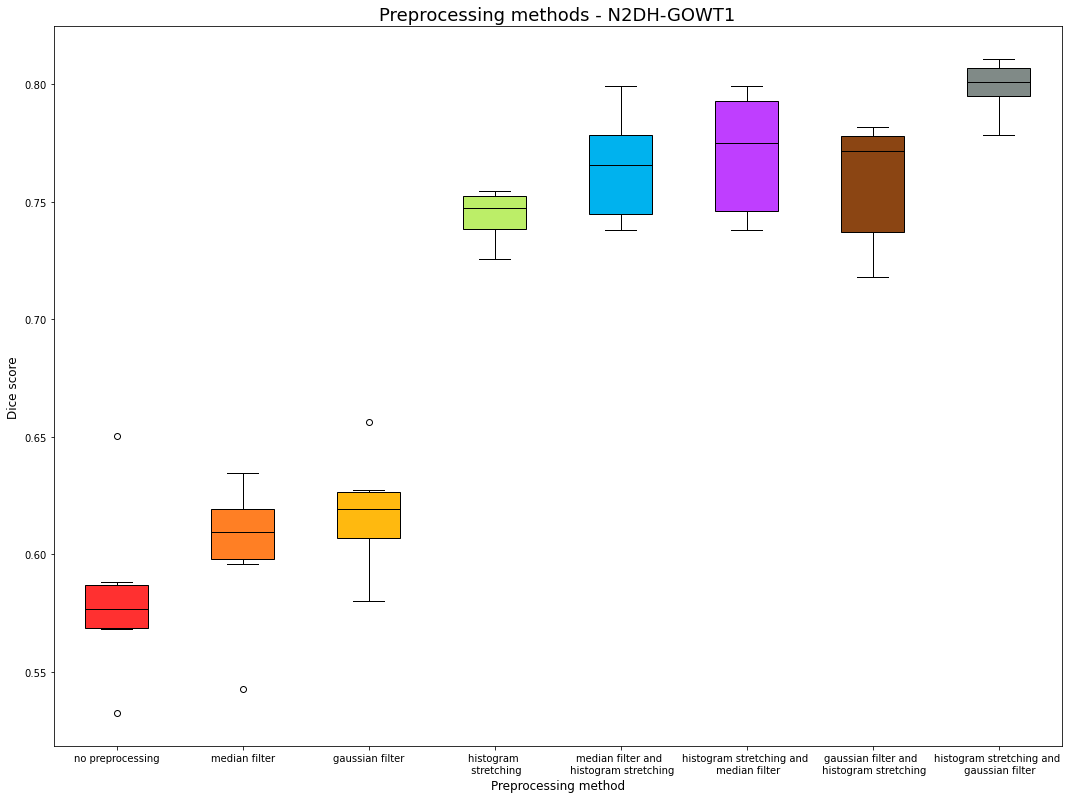

In [211]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot - matplotlib

data_N2DH_GOWT1 = [N2DH_GOWT1_no_preprocessing , N2DH_GOWT1_median_filter , N2DH_GOWT1_gaussian_filter , N2DH_GOWT1_histogram_stretching , N2DH_GOWT1_median_filter_histogram_stretching , N2DH_GOWT1_histogram_stretching_median_filter , N2DH_GOWT1_gaussian_filter_histogram_stretching , N2DH_GOWT1_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DH-GOWT1' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DH_GOWT1, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)



Text(0.5, 0, 'Preprocessing method')

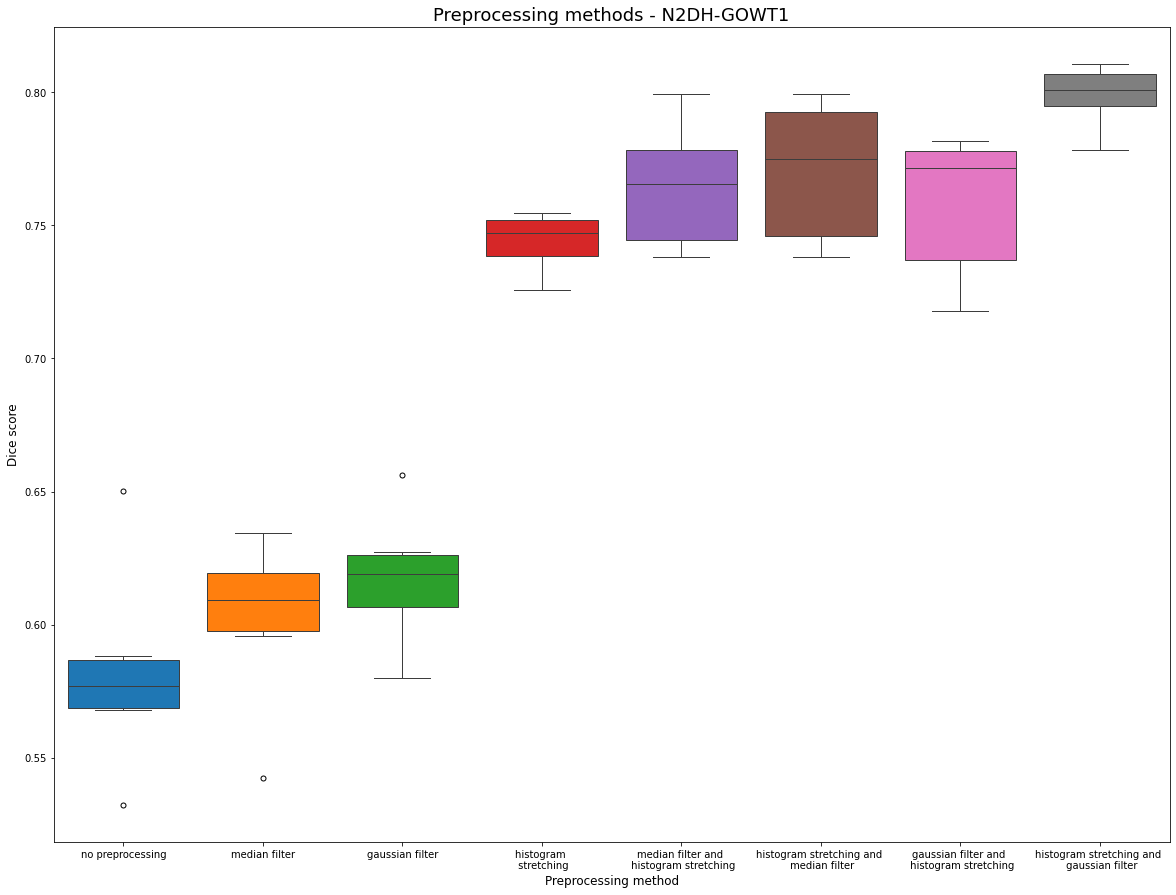

In [212]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot - seaborn

data_N2DH_GOWT1 = [N2DH_GOWT1_no_preprocessing , N2DH_GOWT1_median_filter , N2DH_GOWT1_gaussian_filter , N2DH_GOWT1_histogram_stretching , N2DH_GOWT1_median_filter_histogram_stretching , N2DH_GOWT1_gaussian_filter_histogram_stretching]
df = pd.DataFrame({'no preprocessing' : N2DH_GOWT1_no_preprocessing , 'median filter' : N2DH_GOWT1_median_filter , 'gaussian filter' : N2DH_GOWT1_gaussian_filter , 'histogram \n stretching' : N2DH_GOWT1_histogram_stretching , 'median filter and \n histogram stretching' : N2DH_GOWT1_median_filter_histogram_stretching , 'histogram stretching and \n median filter' : N2DH_GOWT1_histogram_stretching_median_filter , 'gaussian filter and \n histogram stretching' : N2DH_GOWT1_gaussian_filter_histogram_stretching , 'histogram stretching and \n gaussian filter' : N2DH_GOWT1_histogram_stretching_gaussian_filter})
df_melted = pd.melt(df)

plt.figure(figsize=(20,15))
sns.boxplot(x = 'variable' , y = 'value' , data = df_melted  , saturation = 1 , linewidth = 1 , showmeans = False , flierprops = {"marker":"o" , "markerfacecolor":"white" , "markeredgecolor":"black" , "markersize":"5"})
# meanprops={"marker":"+" , "markeredgecolor":"black" , "markersize":"5"}
# sns.swarmplot(x = 'variable' , y = 'value' , data = df_melted , color = '.25')
plt.title('Preprocessing methods - N2DH-GOWT1' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)

In [213]:
mean(N2DH_GOWT1_no_preprocessing)

0.5820119991342715

In [214]:
mean(N2DH_GOWT1_median_filter)

0.6020268712140077

In [215]:
mean(N2DH_GOWT1_gaussian_filter)

0.6175489752871116

In [216]:
mean(N2DH_GOWT1_histogram_stretching)

0.7439474265348033

In [217]:
mean(N2DH_GOWT1_median_filter_histogram_stretching)

0.76477268253223

In [218]:
mean(N2DH_GOWT1_gaussian_filter_histogram_stretching)

0.7580570349113506

In [219]:
# Dice score - N2DLHeLa-dataset
## no preprocessing

N2DLHeLa_no_preprocessing = []

dice_otsu_img_N2DL_HeLa_1 = dsc.dice(otsu_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_img_N2DL_HeLa_2 = dsc.dice(otsu_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_img_N2DL_HeLa_3 = dsc.dice(otsu_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_img_N2DL_HeLa_4 = dsc.dice(otsu_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_no_preprocessing.extend([dice_otsu_img_N2DL_HeLa_1 , dice_otsu_img_N2DL_HeLa_2 , dice_otsu_img_N2DL_HeLa_3 , dice_otsu_img_N2DL_HeLa_4])

print(N2DLHeLa_no_preprocessing)


[0.6961222399023476, 0.65534219596258, 0.7806862514268343, 0.7806012094816297]


In [220]:
# Dice score - N2DLHeLa-dataset
## median filter

N2DLHeLa_median_filter = []

dice_otsu_median_img_N2DL_HeLa_1 = dsc.dice(otsu_median_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_median_img_N2DL_HeLa_2 = dsc.dice(otsu_median_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_median_img_N2DL_HeLa_3 = dsc.dice(otsu_median_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_median_img_N2DL_HeLa_4 = dsc.dice(otsu_median_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_median_filter.extend([dice_otsu_median_img_N2DL_HeLa_1 , dice_otsu_median_img_N2DL_HeLa_2 , dice_otsu_median_img_N2DL_HeLa_3 , dice_otsu_median_img_N2DL_HeLa_4])

print(N2DLHeLa_median_filter)

[0.6891183757591703, 0.6607444463067779, 0.7814894725094859, 0.7790908261014244]


In [221]:
# Dice score - N2DLHeLa-dataset
## gaussian filter

N2DLHeLa_gaussian_filter = []

dice_otsu_gauss_img_N2DL_HeLa_1 = dsc.dice(otsu_gauss_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_gauss_img_N2DL_HeLa_2 = dsc.dice(otsu_gauss_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_gauss_img_N2DL_HeLa_3 = dsc.dice(otsu_gauss_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_gauss_img_N2DL_HeLa_4 = dsc.dice(otsu_gauss_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_gaussian_filter.extend([dice_otsu_gauss_img_N2DL_HeLa_1 , dice_otsu_gauss_img_N2DL_HeLa_2 , dice_otsu_gauss_img_N2DL_HeLa_3 , dice_otsu_gauss_img_N2DL_HeLa_4])

print(N2DLHeLa_gaussian_filter)

[0.7353255276596571, 0.684857480808034, 0.7528828655295244, 0.7545053427697168]


In [222]:
# Dice score - N2DLHeLa-dataset
## histogram stretching

N2DLHeLa_histogram_stretching = []

dice_otsu_stretch_img_N2DL_HeLa_1 = dsc.dice(otsu_stretch_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_stretch_img_N2DL_HeLa_2 = dsc.dice(otsu_stretch_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_stretch_img_N2DL_HeLa_3 = dsc.dice(otsu_stretch_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_stretch_img_N2DL_HeLa_4 = dsc.dice(otsu_stretch_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_histogram_stretching.extend([dice_otsu_stretch_img_N2DL_HeLa_1 , dice_otsu_stretch_img_N2DL_HeLa_2 , dice_otsu_stretch_img_N2DL_HeLa_3 , dice_otsu_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching)

[0.809730635140136, 0.8146261556413248, 0.7972511209448173, 0.795759151830366]


In [223]:
# Dice score - N2DLHeLa-dataset
## median filter and histogram stretching

N2DLHeLa_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_N2DL_HeLa_1 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_median_stretch_img_N2DL_HeLa_2 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_median_stretch_img_N2DL_HeLa_3 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_median_stretch_img_N2DL_HeLa_4 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_N2DL_HeLa_1 , dice_otsu_median_stretch_img_N2DL_HeLa_2 , dice_otsu_median_stretch_img_N2DL_HeLa_3 , dice_otsu_median_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_median_filter_histogram_stretching)

[0.8079542571668326, 0.8118430825324661, 0.797903810535371, 0.7967217574250979]


In [224]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and median filter 

N2DLHeLa_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_N2DL_HeLa_1 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_stretch_median_img_N2DL_HeLa_2 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_stretch_median_img_N2DL_HeLa_3 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_stretch_median_img_N2DL_HeLa_4 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_N2DL_HeLa_1 , dice_otsu_stretch_median_img_N2DL_HeLa_2 , dice_otsu_stretch_median_img_N2DL_HeLa_3 , dice_otsu_stretch_median_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching_median_filter)

[0.80531181447822, 0.8069988915782569, 0.7936725302238652, 0.7930247150277129]


In [225]:
# Dice score - N2DLHeLa-dataset
## gaussian filter and histogram stretching

N2DLHeLa_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_N2DL_HeLa_1 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_gauss_stretch_img_N2DL_HeLa_2 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_gauss_stretch_img_N2DL_HeLa_3 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_gauss_stretch_img_N2DL_HeLa_4 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_N2DL_HeLa_1 , dice_otsu_gauss_stretch_img_N2DL_HeLa_2 , dice_otsu_gauss_stretch_img_N2DL_HeLa_3 , dice_otsu_gauss_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_gaussian_filter_histogram_stretching)

[0.7198842201118772, 0.7503948838463613, 0.7694831326744034, 0.7680709706376164]


In [226]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and gaussian filter 

N2DLHeLa_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_N2DL_HeLa_1 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_stretch_gauss_img_N2DL_HeLa_2 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_stretch_gauss_img_N2DL_HeLa_3 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_stretch_gauss_img_N2DL_HeLa_4 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_N2DL_HeLa_1 , dice_otsu_stretch_gauss_img_N2DL_HeLa_2 , dice_otsu_stretch_gauss_img_N2DL_HeLa_3 , dice_otsu_stretch_gauss_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching_gaussian_filter)

[0.7630122568159441, 0.7788726313264572, 0.7771252120838505, 0.7786150041220116]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_3551/2862098958.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


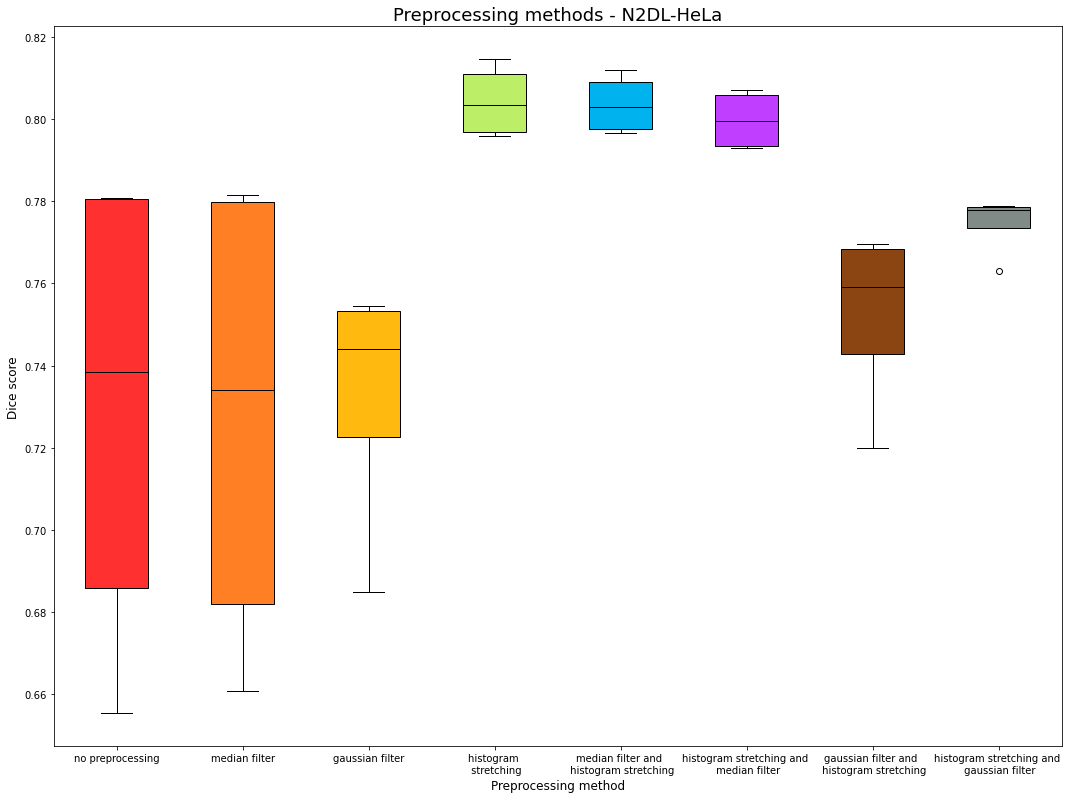

In [227]:
# Dice score - preprocessing - N2DLHeLa-dataset - boxplot

data_N2DLHeLa = [N2DLHeLa_no_preprocessing , N2DLHeLa_median_filter , N2DLHeLa_gaussian_filter , N2DLHeLa_histogram_stretching , N2DLHeLa_median_filter_histogram_stretching , N2DLHeLa_histogram_stretching_median_filter , N2DLHeLa_gaussian_filter_histogram_stretching , N2DLHeLa_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DL-HeLa' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DLHeLa, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

/Users/maribelschneider/Documents/Uni/Bachelor - Molekulare Biotechnologie/Vorlesungsunterlagen/weitere Dateien/FS4/Data Analysis/2022-topic-01-team-04/images_segmentation/preprocessing.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Median filter and \n histogram stretching' , 'Histogram stretching and \n median filter' , 'Gaussian filter and \n histogram stretching' , 'Histogram stretching and \n gaussian filter'])


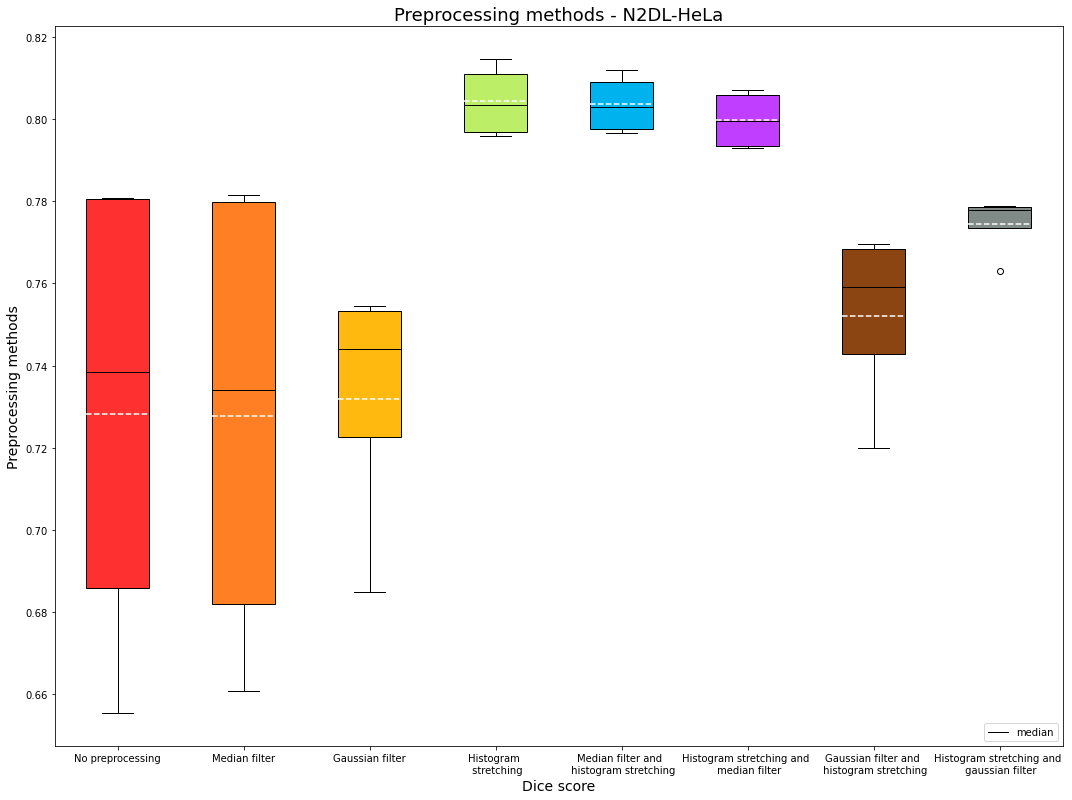

In [228]:
pp.dataset_boxplot(data_N2DLHeLa , 'Preprocessing methods - N2DL-HeLa')

/Users/maribelschneider/Documents/Uni/Bachelor - Molekulare Biotechnologie/Vorlesungsunterlagen/weitere Dateien/FS4/Data Analysis/2022-topic-01-team-04/images_segmentation/preprocessing.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Median filter and \n histogram stretching' , 'Histogram stretching and \n median filter' , 'Gaussian filter and \n histogram stretching' , 'Histogram stretching and \n gaussian filter'])


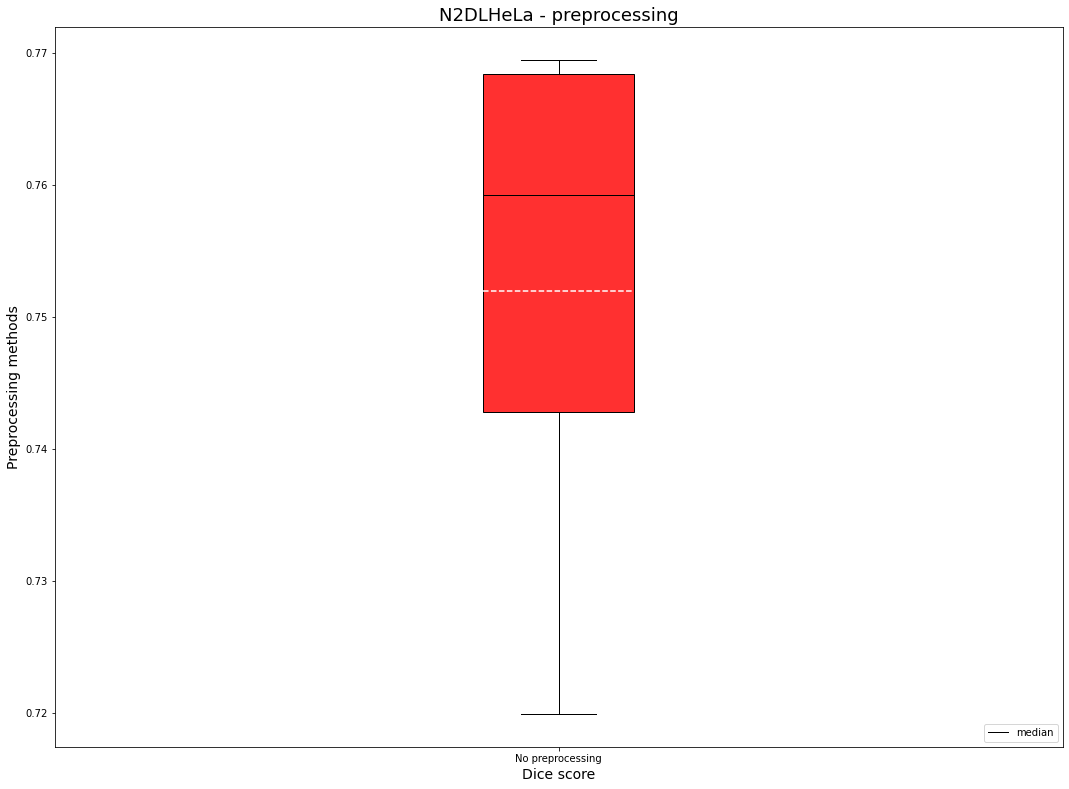

In [260]:
pp.dataset_boxplot(N2DLHeLa_gaussian_filter_histogram_stretching , 'N2DLHeLa - preprocessing')

Text(0.5, 0, 'Preprocessing method')

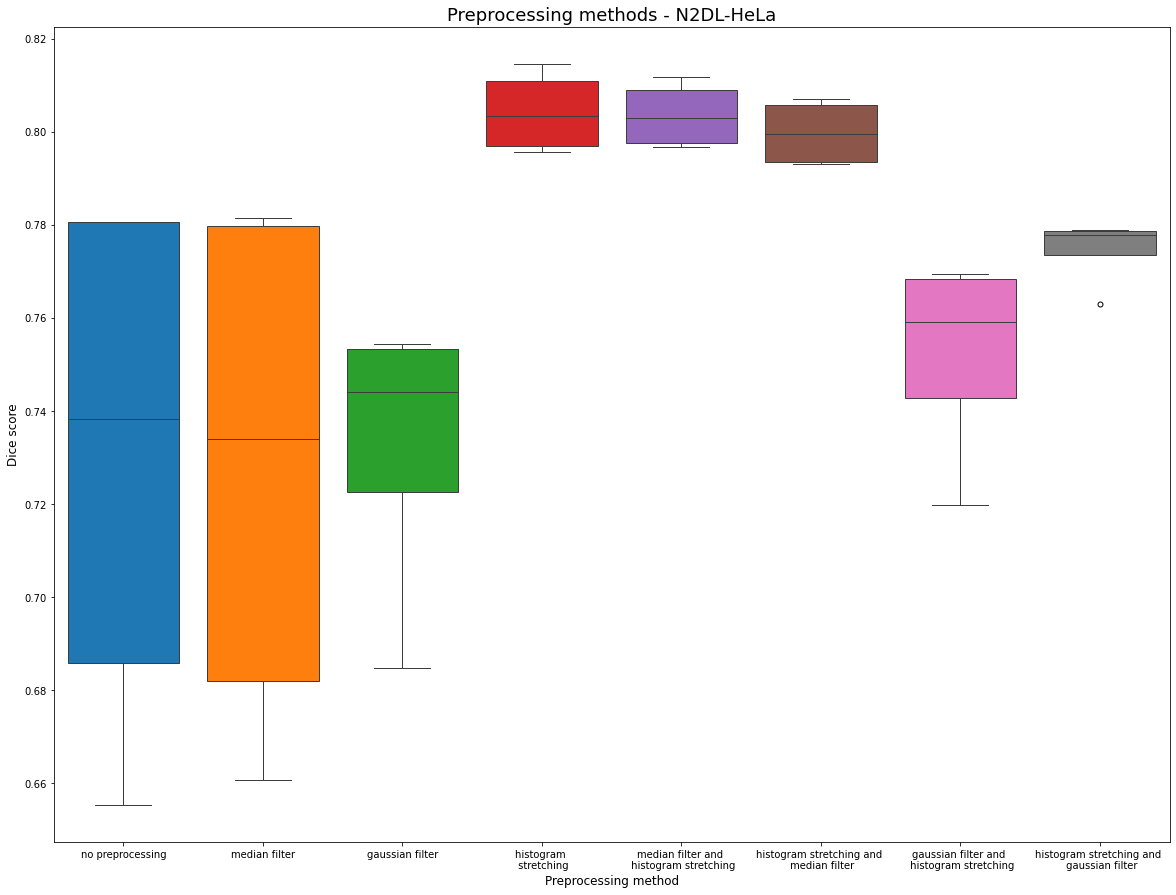

In [229]:
# Dice score - preprocessing - N2DL-HeLa-dataset - boxplot - seaborn

data_N2DL_HeLa = [N2DLHeLa_no_preprocessing , N2DLHeLa_median_filter , N2DLHeLa_gaussian_filter , N2DLHeLa_histogram_stretching , N2DLHeLa_median_filter_histogram_stretching , N2DLHeLa_gaussian_filter_histogram_stretching]
df = pd.DataFrame({'no preprocessing' : N2DLHeLa_no_preprocessing , 'median filter' : N2DLHeLa_median_filter , 'gaussian filter' : N2DLHeLa_gaussian_filter , 'histogram \n stretching' : N2DLHeLa_histogram_stretching , 'median filter and \n histogram stretching' : N2DLHeLa_median_filter_histogram_stretching , 'histogram stretching and \n median filter' : N2DLHeLa_histogram_stretching_median_filter , 'gaussian filter and \n histogram stretching' : N2DLHeLa_gaussian_filter_histogram_stretching ,'histogram stretching and \n gaussian filter' : N2DLHeLa_histogram_stretching_gaussian_filter})
df_melted = pd.melt(df)

plt.figure(figsize=(20,15))
sns.boxplot(x = 'variable' , y = 'value' , data = df_melted  , saturation = 1 , linewidth = 1 , showmeans = False , flierprops = {"marker":"o" , "markerfacecolor":"white" , "markeredgecolor":"black" , "markersize":"5"})
# meanprops={"marker":"+" , "markeredgecolor":"black" , "markersize":"5"}
# sns.swarmplot(x = 'variable' , y = 'value' , data = df_melted , color = '.25')
plt.title('Preprocessing methods - N2DL-HeLa' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)

In [230]:
mean(N2DLHeLa_no_preprocessing)

0.7281879741933479

In [231]:
mean(N2DH_GOWT1_median_filter)

0.6020268712140077

In [232]:
mean(N2DH_GOWT1_gaussian_filter)

0.6175489752871116

In [233]:
mean(N2DLHeLa_histogram_stretching)

0.8043417658891611

In [234]:
mean(N2DLHeLa_median_filter_histogram_stretching)

0.8036057269149419

In [235]:
mean(N2DLHeLa_gaussian_filter_histogram_stretching)

0.7519583018175646

In [236]:
# Dice score - NIH3T3-dataset
## no preprocessing

NIH3T3_no_preprocessing = []

dice_otsu_img_NIH3T3_1 = dsc.dice(otsu_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_img_NIH3T3_2 = dsc.dice(otsu_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_img_NIH3T3_3 = dsc.dice(otsu_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_img_NIH3T3_4 = dsc.dice(otsu_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_img_NIH3T3_5 = dsc.dice(otsu_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_img_NIH3T3_6 = dsc.dice(otsu_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_img_NIH3T3_7 = dsc.dice(otsu_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_img_NIH3T3_8 = dsc.dice(otsu_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_img_NIH3T3_9 = dsc.dice(otsu_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_img_NIH3T3_10 = dsc.dice(otsu_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_img_NIH3T3_11 = dsc.dice(otsu_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_img_NIH3T3_12 = dsc.dice(otsu_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_img_NIH3T3_13 = dsc.dice(otsu_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_img_NIH3T3_14 = dsc.dice(otsu_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_img_NIH3T3_15 = dsc.dice(otsu_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_img_NIH3T3_16 = dsc.dice(otsu_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_img_NIH3T3_17 = dsc.dice(otsu_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_img_NIH3T3_18 = dsc.dice(otsu_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_no_preprocessing.extend([dice_otsu_img_NIH3T3_1 , dice_otsu_img_NIH3T3_2 , dice_otsu_img_NIH3T3_3 , dice_otsu_img_NIH3T3_4 , dice_otsu_img_NIH3T3_5 , dice_otsu_img_NIH3T3_6 , dice_otsu_img_NIH3T3_7 , dice_otsu_img_NIH3T3_8 , dice_otsu_img_NIH3T3_9 , dice_otsu_img_NIH3T3_10 , dice_otsu_img_NIH3T3_11 , dice_otsu_img_NIH3T3_12 , dice_otsu_img_NIH3T3_13 , dice_otsu_img_NIH3T3_14 , dice_otsu_img_NIH3T3_15 , dice_otsu_img_NIH3T3_16 , dice_otsu_img_NIH3T3_17 , dice_otsu_img_NIH3T3_18])

print(NIH3T3_no_preprocessing)

[0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932]


In [237]:
# Dice score - N2DLHeLa-dataset
## median filter

NIH3T3_median_filter = []

dice_otsu_median_img_NIH3T3_1 = dsc.dice(otsu_median_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_median_img_NIH3T3_2 = dsc.dice(otsu_median_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_median_img_NIH3T3_3 = dsc.dice(otsu_median_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_median_img_NIH3T3_4 = dsc.dice(otsu_median_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_median_img_NIH3T3_5 = dsc.dice(otsu_median_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_median_img_NIH3T3_6 = dsc.dice(otsu_median_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_median_img_NIH3T3_7 = dsc.dice(otsu_median_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_median_img_NIH3T3_8 = dsc.dice(otsu_median_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_median_img_NIH3T3_9 = dsc.dice(otsu_median_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_median_img_NIH3T3_10 = dsc.dice(otsu_median_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_median_img_NIH3T3_11 = dsc.dice(otsu_median_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_median_img_NIH3T3_12 = dsc.dice(otsu_median_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_median_img_NIH3T3_13 = dsc.dice(otsu_median_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_median_img_NIH3T3_14 = dsc.dice(otsu_median_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_median_img_NIH3T3_15 = dsc.dice(otsu_median_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_median_img_NIH3T3_16 = dsc.dice(otsu_median_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_median_img_NIH3T3_17 = dsc.dice(otsu_median_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_median_img_NIH3T3_18 = dsc.dice(otsu_median_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_median_filter.extend([dice_otsu_median_img_NIH3T3_1 , dice_otsu_median_img_NIH3T3_2 , dice_otsu_median_img_NIH3T3_3 , dice_otsu_median_img_NIH3T3_4 , dice_otsu_median_img_NIH3T3_5 , dice_otsu_median_img_NIH3T3_6 , dice_otsu_median_img_NIH3T3_7 , dice_otsu_median_img_NIH3T3_8 , dice_otsu_median_img_NIH3T3_9 , dice_otsu_median_img_NIH3T3_10 , dice_otsu_median_img_NIH3T3_11 , dice_otsu_median_img_NIH3T3_12 , dice_otsu_median_img_NIH3T3_13 , dice_otsu_median_img_NIH3T3_14 , dice_otsu_median_img_NIH3T3_15 , dice_otsu_median_img_NIH3T3_16 , dice_otsu_median_img_NIH3T3_17 , dice_otsu_median_img_NIH3T3_18])

print(NIH3T3_median_filter)

[0.8946808298799254, 0.8849869001333296, 0.8300675280378401, 0.7357748411841214, 0.7529539648467392, 0.6170388301551231, 0.6099779516517357, 0.6973465117594204, 0.03084486966478485, 0.4631152690677724, 0.0, 0.6824470203713232, 0.00014050370578524009, 0.5739847098266359, 0.6282657339684911, 0.06504850709187047, 0.0682745069747111, 0.7978706098963664]


In [238]:
# Dice score - NIH3T3-dataset
## gaussian filter

NIH3T3_gaussian_filter = []

dice_otsu_gauss_img_NIH3T3_1 = dsc.dice(otsu_gauss_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_gauss_img_NIH3T3_2 = dsc.dice(otsu_gauss_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_gauss_img_NIH3T3_3 = dsc.dice(otsu_gauss_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_gauss_img_NIH3T3_4 = dsc.dice(otsu_gauss_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_gauss_img_NIH3T3_5 = dsc.dice(otsu_gauss_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_gauss_img_NIH3T3_6 = dsc.dice(otsu_gauss_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_gauss_img_NIH3T3_7 = dsc.dice(otsu_gauss_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_gauss_img_NIH3T3_8 = dsc.dice(otsu_gauss_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_gauss_img_NIH3T3_9 = dsc.dice(otsu_gauss_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_gauss_img_NIH3T3_10 = dsc.dice(otsu_gauss_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_gauss_img_NIH3T3_11 = dsc.dice(otsu_gauss_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_gauss_img_NIH3T3_12 = dsc.dice(otsu_gauss_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_gauss_img_NIH3T3_13 = dsc.dice(otsu_gauss_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_gauss_img_NIH3T3_14 = dsc.dice(otsu_gauss_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_gauss_img_NIH3T3_15 = dsc.dice(otsu_gauss_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_gauss_img_NIH3T3_16 = dsc.dice(otsu_gauss_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_gauss_img_NIH3T3_17 = dsc.dice(otsu_gauss_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_gauss_img_NIH3T3_18 = dsc.dice(otsu_gauss_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_gaussian_filter.extend([dice_otsu_gauss_img_NIH3T3_1 , dice_otsu_gauss_img_NIH3T3_2 , dice_otsu_gauss_img_NIH3T3_3 , dice_otsu_gauss_img_NIH3T3_4 , dice_otsu_gauss_img_NIH3T3_5 , dice_otsu_gauss_img_NIH3T3_6 , dice_otsu_gauss_img_NIH3T3_7 , dice_otsu_gauss_img_NIH3T3_8 , dice_otsu_gauss_img_NIH3T3_9 , dice_otsu_gauss_img_NIH3T3_10 , dice_otsu_gauss_img_NIH3T3_11 , dice_otsu_gauss_img_NIH3T3_12 , dice_otsu_gauss_img_NIH3T3_13 , dice_otsu_gauss_img_NIH3T3_14 , dice_otsu_gauss_img_NIH3T3_15 , dice_otsu_gauss_img_NIH3T3_16 , dice_otsu_gauss_img_NIH3T3_17 , dice_otsu_gauss_img_NIH3T3_18])

print(NIH3T3_gaussian_filter)

[0.9082523752671016, 0.8932649125192117, 0.8208764032672039, 0.7371588919071718, 0.7507718679691837, 0.6606204786655497, 0.654503146981438, 0.7239110450042866, 0.03142585690272601, 0.4513501308445844, 0.0, 0.6764291468715086, 0.00024496830722525276, 0.5780641819580601, 0.6075115822469912, 0.05041662344846662, 0.07566175730533096, 0.7836327416656241]


In [239]:
# Dice score - NIH3T3-dataset
## histogram stretching

NIH3T3_histogram_stretching = []

dice_otsu_stretch_img_NIH3T3_1 = dsc.dice(otsu_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_img_NIH3T3_2 = dsc.dice(otsu_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_img_NIH3T3_3 = dsc.dice(otsu_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_img_NIH3T3_4 = dsc.dice(otsu_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_img_NIH3T3_5 = dsc.dice(otsu_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_img_NIH3T3_6 = dsc.dice(otsu_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_img_NIH3T3_7 = dsc.dice(otsu_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_img_NIH3T3_8 = dsc.dice(otsu_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_img_NIH3T3_9 = dsc.dice(otsu_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_img_NIH3T3_10 = dsc.dice(otsu_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_img_NIH3T3_11 = dsc.dice(otsu_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_img_NIH3T3_12 = dsc.dice(otsu_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_img_NIH3T3_13 = dsc.dice(otsu_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_img_NIH3T3_14 = dsc.dice(otsu_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_img_NIH3T3_15 = dsc.dice(otsu_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_img_NIH3T3_16 = dsc.dice(otsu_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_img_NIH3T3_17 = dsc.dice(otsu_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_img_NIH3T3_18 = dsc.dice(otsu_stretch_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching.extend([dice_otsu_stretch_img_NIH3T3_1 , dice_otsu_stretch_img_NIH3T3_2 , dice_otsu_stretch_img_NIH3T3_3 , dice_otsu_stretch_img_NIH3T3_4 , dice_otsu_stretch_img_NIH3T3_5 , dice_otsu_stretch_img_NIH3T3_6 , dice_otsu_stretch_img_NIH3T3_7 , dice_otsu_stretch_img_NIH3T3_8 , dice_otsu_stretch_img_NIH3T3_9 , dice_otsu_stretch_img_NIH3T3_10 , dice_otsu_stretch_img_NIH3T3_11 , dice_otsu_stretch_img_NIH3T3_12 , dice_otsu_stretch_img_NIH3T3_13 , dice_otsu_stretch_img_NIH3T3_14 , dice_otsu_stretch_img_NIH3T3_15 , dice_otsu_stretch_img_NIH3T3_16 , dice_otsu_stretch_img_NIH3T3_17 , dice_otsu_stretch_img_NIH3T3_18])

print(NIH3T3_histogram_stretching)

[0.9128436675562167, 0.8845252721173281, 0.8248360803970239, 0.758336987687637, 0.7713626482081649, 0.7238225870669582, 0.6814227277548294, 0.750270864797426, 0.15958982821109705, 0.6201720440183929, 0.6454109779570866, 0.680536637820677, 0.5594608126656365, 0.5970450004221428, 0.6165448260228947, 0.594356565444854, 0.714806990589591, 0.7925039681767514]


In [240]:
# Dice score - NIH3T3-dataset
## median filter and histogram stretching

NIH3T3_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_NIH3T3_1 = dsc.dice(otsu_median_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_median_stretch_img_NIH3T3_2 = dsc.dice(otsu_median_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_median_stretch_img_NIH3T3_3 = dsc.dice(otsu_median_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_median_stretch_img_NIH3T3_4 = dsc.dice(otsu_median_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_median_stretch_img_NIH3T3_5 = dsc.dice(otsu_median_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_median_stretch_img_NIH3T3_6 = dsc.dice(otsu_median_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_median_stretch_img_NIH3T3_7 = dsc.dice(otsu_median_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_median_stretch_img_NIH3T3_8 = dsc.dice(otsu_median_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_median_stretch_img_NIH3T3_9 = dsc.dice(otsu_median_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_median_stretch_img_NIH3T3_10 = dsc.dice(otsu_median_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_median_stretch_img_NIH3T3_11 = dsc.dice(otsu_median_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_median_stretch_img_NIH3T3_12 = dsc.dice(otsu_median_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_median_stretch_img_NIH3T3_13 = dsc.dice(otsu_median_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_median_stretch_img_NIH3T3_14 = dsc.dice(otsu_median_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_median_stretch_img_NIH3T3_15 = dsc.dice(otsu_median_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_median_stretch_img_NIH3T3_16 = dsc.dice(otsu_median_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_median_stretch_img_NIH3T3_17 = dsc.dice(otsu_median_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_median_stretch_img_NIH3T3_18 = dsc.dice(otsu_median_stretch_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_NIH3T3_1 , dice_otsu_median_stretch_img_NIH3T3_2 , dice_otsu_median_stretch_img_NIH3T3_3 , dice_otsu_median_stretch_img_NIH3T3_4 , dice_otsu_median_stretch_img_NIH3T3_5 , dice_otsu_median_stretch_img_NIH3T3_6 , dice_otsu_median_stretch_img_NIH3T3_7 , dice_otsu_median_stretch_img_NIH3T3_8 , dice_otsu_median_stretch_img_NIH3T3_9 , dice_otsu_median_stretch_img_NIH3T3_10 , dice_otsu_median_stretch_img_NIH3T3_11 , dice_otsu_median_stretch_img_NIH3T3_12 , dice_otsu_median_stretch_img_NIH3T3_13 , dice_otsu_median_stretch_img_NIH3T3_14 , dice_otsu_median_stretch_img_NIH3T3_15 , dice_otsu_median_stretch_img_NIH3T3_16 , dice_otsu_median_stretch_img_NIH3T3_17 , dice_otsu_median_stretch_img_NIH3T3_18])

print(NIH3T3_median_filter_histogram_stretching)

[0.9126064899014071, 0.8849869001333296, 0.8300675280378401, 0.7593498927123763, 0.7715177523362349, 0.7258770509442753, 0.6876649043248704, 0.7542425610642468, 0.1710989927813985, 0.6201253474708661, 0.6457822491803156, 0.6824470203713232, 0.5608004693361966, 0.5962434107588243, 0.6148696080827027, 0.5940741781631523, 0.7154374219483178, 0.7934323834146368]


In [241]:
# Dice score - NIH3T3-dataset
## histogram stretching and median filter

NIH3T3_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_NIH3T3_1 = dsc.dice(otsu_stretch_median_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_median_img_NIH3T3_2 = dsc.dice(otsu_stretch_median_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_median_img_NIH3T3_3 = dsc.dice(otsu_stretch_median_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_median_img_NIH3T3_4 = dsc.dice(otsu_stretch_median_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_median_img_NIH3T3_5 = dsc.dice(otsu_stretch_median_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_median_img_NIH3T3_6 = dsc.dice(otsu_stretch_median_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_median_img_NIH3T3_7 = dsc.dice(otsu_stretch_median_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_median_img_NIH3T3_8 = dsc.dice(otsu_stretch_median_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_median_img_NIH3T3_9 = dsc.dice(otsu_stretch_median_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_median_img_NIH3T3_10 = dsc.dice(otsu_stretch_median_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_median_img_NIH3T3_11 = dsc.dice(otsu_stretch_median_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_median_img_NIH3T3_12 = dsc.dice(otsu_stretch_median_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_median_img_NIH3T3_13 = dsc.dice(otsu_stretch_median_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_median_img_NIH3T3_14 = dsc.dice(otsu_stretch_median_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_median_img_NIH3T3_15 = dsc.dice(otsu_stretch_median_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_median_img_NIH3T3_16 = dsc.dice(otsu_stretch_median_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_median_img_NIH3T3_17 = dsc.dice(otsu_stretch_median_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_median_img_NIH3T3_18 = dsc.dice(otsu_stretch_median_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_NIH3T3_1 , dice_otsu_stretch_median_img_NIH3T3_2 ,dice_otsu_stretch_median_img_NIH3T3_3 , dice_otsu_stretch_median_img_NIH3T3_4 , dice_otsu_stretch_median_img_NIH3T3_5 , dice_otsu_stretch_median_img_NIH3T3_6 , dice_otsu_stretch_median_img_NIH3T3_7 , dice_otsu_stretch_median_img_NIH3T3_8 , dice_otsu_stretch_median_img_NIH3T3_9 , dice_otsu_stretch_median_img_NIH3T3_10 , dice_otsu_stretch_median_img_NIH3T3_11 , dice_otsu_stretch_median_img_NIH3T3_12 , dice_otsu_stretch_median_img_NIH3T3_13 , dice_otsu_stretch_median_img_NIH3T3_14 , dice_otsu_stretch_median_img_NIH3T3_15 , dice_otsu_stretch_median_img_NIH3T3_16 , dice_otsu_stretch_median_img_NIH3T3_17 , dice_otsu_stretch_median_img_NIH3T3_18])

print(NIH3T3_histogram_stretching_median_filter)

[0.9126064899014071, 0.8849869001333296, 0.8300675280378401, 0.7593498927123763, 0.7715177523362349, 0.7258770509442753, 0.6876649043248704, 0.7542425610642468, 0.15580528032494306, 0.6195514990251372, 0.6457822491803156, 0.6824470203713232, 0.5608004693361966, 0.5962434107588243, 0.6148696080827027, 0.5940741781631523, 0.7154374219483178, 0.7934323834146368]


In [242]:
# Dice score - NIH3T3-dataset
## gaussian filter and histogram stretching

thresholded = [otsu_gauss_stretch_img_NIH3T3_1 , otsu_gauss_stretch_img_NIH3T3_2 , otsu_gauss_stretch_img_NIH3T3_3, otsu_gauss_stretch_img_NIH3T3_4 , otsu_gauss_stretch_img_NIH3T3_5 , otsu_gauss_stretch_img_NIH3T3_6 , otsu_gauss_stretch_img_NIH3T3_7 , otsu_gauss_stretch_img_NIH3T3_8 , otsu_gauss_stretch_img_NIH3T3_9 , otsu_gauss_stretch_img_NIH3T3_10 , otsu_gauss_stretch_img_NIH3T3_11 , otsu_gauss_stretch_img_NIH3T3_12 , otsu_gauss_stretch_img_NIH3T3_13 , otsu_gauss_stretch_img_NIH3T3_14 , otsu_gauss_stretch_img_NIH3T3_15 , otsu_gauss_stretch_img_NIH3T3_16 , otsu_gauss_stretch_img_NIH3T3_17 , otsu_gauss_stretch_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_NIH3T3_1 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_gauss_stretch_img_NIH3T3_2 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_gauss_stretch_img_NIH3T3_3 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_gauss_stretch_img_NIH3T3_4 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_gauss_stretch_img_NIH3T3_5 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_gauss_stretch_img_NIH3T3_6 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_gauss_stretch_img_NIH3T3_7 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_gauss_stretch_img_NIH3T3_8 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_gauss_stretch_img_NIH3T3_9 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_gauss_stretch_img_NIH3T3_10 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_gauss_stretch_img_NIH3T3_11 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_gauss_stretch_img_NIH3T3_12 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_gauss_stretch_img_NIH3T3_13 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_gauss_stretch_img_NIH3T3_14 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_gauss_stretch_img_NIH3T3_15 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_gauss_stretch_img_NIH3T3_16 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_gauss_stretch_img_NIH3T3_17 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_gauss_stretch_img_NIH3T3_18 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_18 , gt_NIH3T3_18)

NIH3T3_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_NIH3T3_1 , dice_otsu_gauss_stretch_img_NIH3T3_2 , dice_otsu_gauss_stretch_img_NIH3T3_3 , dice_otsu_gauss_stretch_img_NIH3T3_4 , dice_otsu_gauss_stretch_img_NIH3T3_5 , dice_otsu_gauss_stretch_img_NIH3T3_6 , dice_otsu_gauss_stretch_img_NIH3T3_7 , dice_otsu_gauss_stretch_img_NIH3T3_8 , dice_otsu_gauss_stretch_img_NIH3T3_9 , dice_otsu_gauss_stretch_img_NIH3T3_10 , dice_otsu_gauss_stretch_img_NIH3T3_11 , dice_otsu_gauss_stretch_img_NIH3T3_12 , dice_otsu_gauss_stretch_img_NIH3T3_13 , dice_otsu_gauss_stretch_img_NIH3T3_14 , dice_otsu_gauss_stretch_img_NIH3T3_15 , dice_otsu_gauss_stretch_img_NIH3T3_16 , dice_otsu_gauss_stretch_img_NIH3T3_17 , dice_otsu_gauss_stretch_img_NIH3T3_18])

print(NIH3T3_gaussian_filter_histogram_stretching)

[0.9144616372614532, 0.9012129102994586, 0.8208926208002388, 0.7623218241256927, 0.769759320362861, 0.7218020077118498, 0.6739639291188563, 0.7436767997218661, 0.14872482957589342, 0.6020135479460568, 0.6342239605142415, 0.6747674412958218, 0.5441153533579057, 0.5857851627385573, 0.6070616637604315, 0.5960368014148862, 0.7172582975381304, 0.779165408133814]


In [243]:
# Dice score - NIH3T3-dataset
## histogram stretching and gaussian filter

NIH3T3_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_NIH3T3_1 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_gauss_img_NIH3T3_2 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_gauss_img_NIH3T3_3 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_gauss_img_NIH3T3_4 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_gauss_img_NIH3T3_5 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_gauss_img_NIH3T3_6 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_gauss_img_NIH3T3_7 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_gauss_img_NIH3T3_8 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_gauss_img_NIH3T3_9 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_gauss_img_NIH3T3_10 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_gauss_img_NIH3T3_11 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_gauss_img_NIH3T3_12 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_gauss_img_NIH3T3_13 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_gauss_img_NIH3T3_14 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_gauss_img_NIH3T3_15 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_gauss_img_NIH3T3_16 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_gauss_img_NIH3T3_17 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_gauss_img_NIH3T3_18 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_NIH3T3_1 , dice_otsu_stretch_gauss_img_NIH3T3_2 ,dice_otsu_stretch_gauss_img_NIH3T3_3 , dice_otsu_stretch_gauss_img_NIH3T3_4 , dice_otsu_stretch_gauss_img_NIH3T3_5 , dice_otsu_stretch_gauss_img_NIH3T3_6 , dice_otsu_stretch_gauss_img_NIH3T3_7 , dice_otsu_stretch_gauss_img_NIH3T3_8 , dice_otsu_stretch_gauss_img_NIH3T3_9 , dice_otsu_stretch_gauss_img_NIH3T3_10 , dice_otsu_stretch_gauss_img_NIH3T3_11 , dice_otsu_stretch_gauss_img_NIH3T3_12 , dice_otsu_stretch_gauss_img_NIH3T3_13 , dice_otsu_stretch_gauss_img_NIH3T3_14 , dice_otsu_stretch_gauss_img_NIH3T3_15 , dice_otsu_stretch_gauss_img_NIH3T3_16 , dice_otsu_stretch_gauss_img_NIH3T3_17 , dice_otsu_stretch_gauss_img_NIH3T3_18])

print(NIH3T3_histogram_stretching_gaussian_filter)

[0.9173269061846883, 0.905840399829995, 0.8209912500213584, 0.76344829966294, 0.7709654792702151, 0.7213560551124003, 0.6738111435468639, 0.7429169576226832, 0.15264271130075435, 0.6018626738382516, 0.637507454097537, 0.6749254312021787, 0.5345029515567399, 0.5854017726380195, 0.6067217750103363, 0.5973615216604272, 0.7225942167816346, 0.7803179854891965]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_3551/3156945178.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


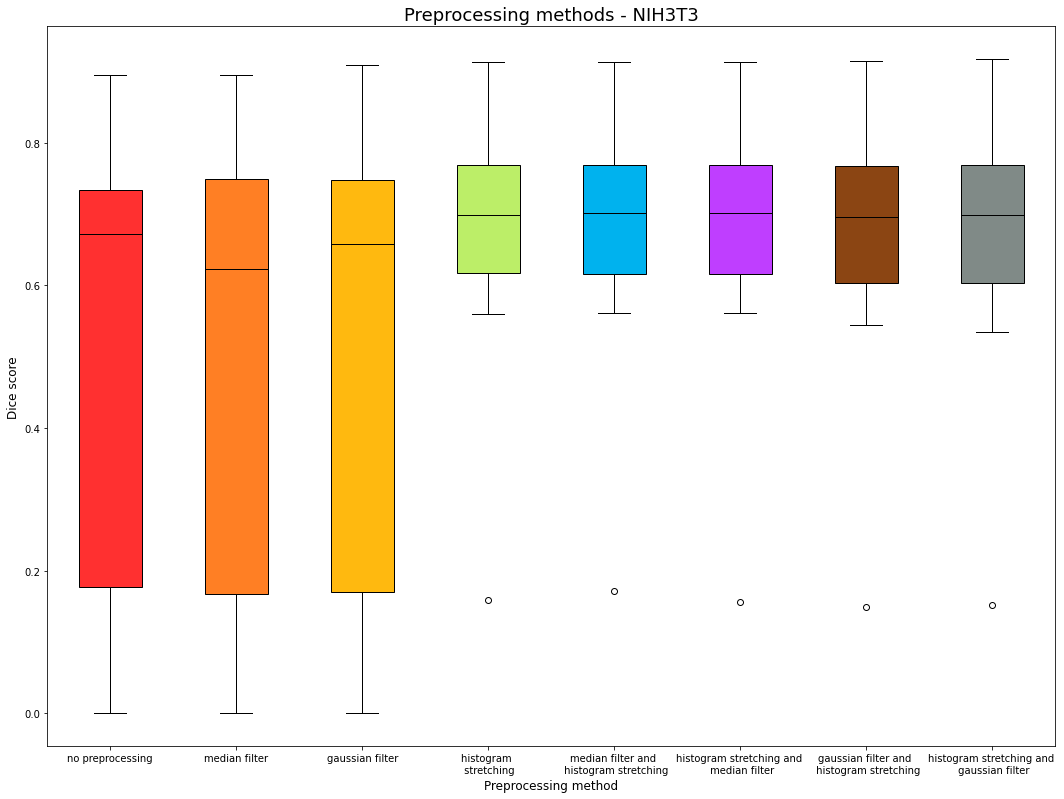

In [244]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot

data_NIH3T3 = [NIH3T3_no_preprocessing , NIH3T3_median_filter , NIH3T3_gaussian_filter , NIH3T3_histogram_stretching , NIH3T3_median_filter_histogram_stretching , NIH3T3_histogram_stretching_median_filter , NIH3T3_gaussian_filter_histogram_stretching , NIH3T3_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_NIH3T3, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

Text(0.5, 0, 'Preprocessing method')

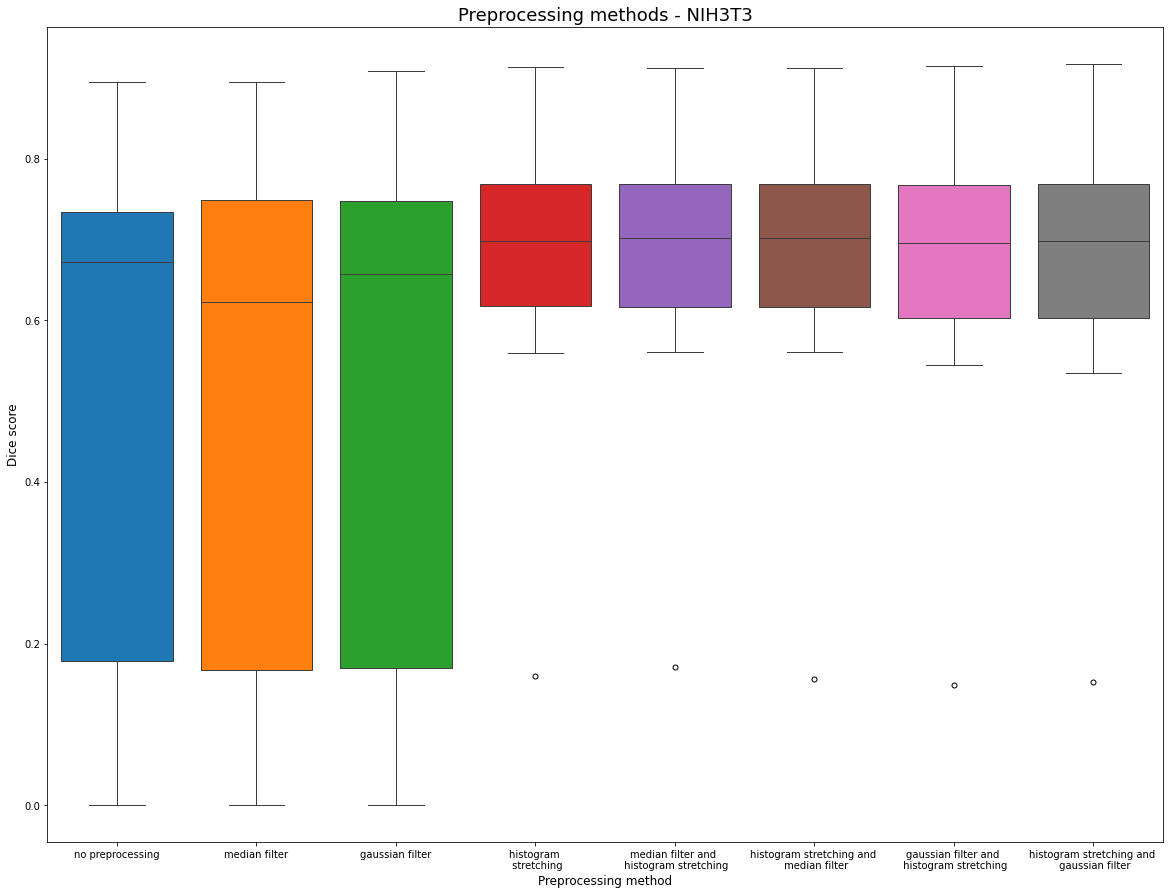

In [245]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot - seaborn

data_NIH3T3 = [NIH3T3_no_preprocessing , NIH3T3_median_filter , NIH3T3_gaussian_filter , NIH3T3_histogram_stretching , NIH3T3_median_filter_histogram_stretching , NIH3T3_gaussian_filter_histogram_stretching]
df = pd.DataFrame({'no preprocessing' : NIH3T3_no_preprocessing , 'median filter' : NIH3T3_median_filter , 'gaussian filter' : NIH3T3_gaussian_filter , 'histogram \n stretching' : NIH3T3_histogram_stretching , 'median filter and \n histogram stretching' : NIH3T3_median_filter_histogram_stretching , 'histogram stretching and \n median filter' : NIH3T3_histogram_stretching_median_filter , 'gaussian filter and \n histogram stretching' : NIH3T3_gaussian_filter_histogram_stretching , 'histogram stretching and \n gaussian filter' : NIH3T3_histogram_stretching_gaussian_filter})
df_melted = pd.melt(df)

plt.figure(figsize=(20,15))
sns.boxplot(x = 'variable' , y = 'value' , data = df_melted  , saturation = 1 , linewidth = 1 , showmeans = False , flierprops = {"marker":"o" , "markerfacecolor":"white" , "markeredgecolor":"black" , "markersize":"5"})
# meanprops={"marker":"+" , "markeredgecolor":"black" , "markersize":"5"}
# sns.swarmplot(x = 'variable' , y = 'value' , data = df_melted , color = '.25')
plt.title('Preprocessing methods - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)

/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_3551/1930828192.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Median filter and \n histogram stretching' , 'Histogram stretching and \n median filter' , 'Gaussian filter and \n histogram stretching' , 'Histogram stretching and \n gaussian filter'])


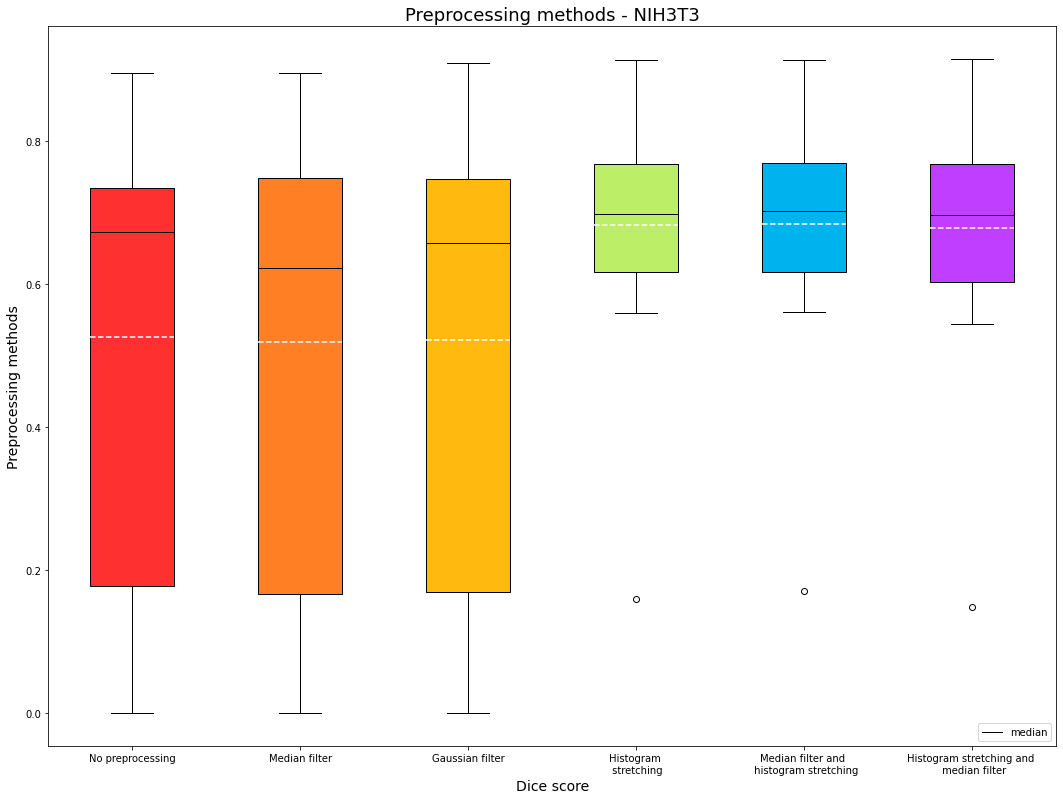

In [246]:
dataset_boxplot(data_NIH3T3 , 'Preprocessing methods - NIH3T3')

In [247]:
mean(NIH3T3_no_preprocessing)

0.5264089707099551

In [248]:
mean(NIH3T3_median_filter)

0.518489949345332

In [249]:
mean(NIH3T3_gaussian_filter)

0.5224497839517591

In [250]:
mean(NIH3T3_histogram_stretching)

0.6826582492730393

In [251]:
mean(NIH3T3_median_filter_histogram_stretching)

0.6844791200534618

In [252]:
mean(NIH3T3_gaussian_filter_histogram_stretching)

0.6776246397598897

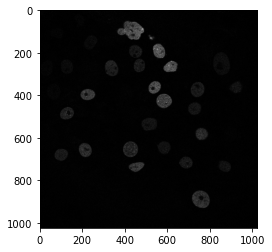

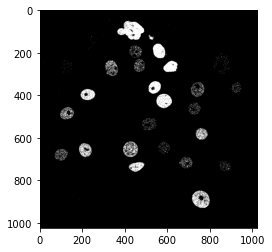

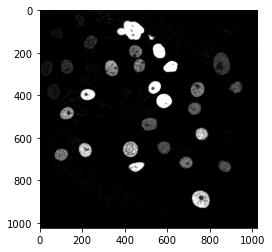

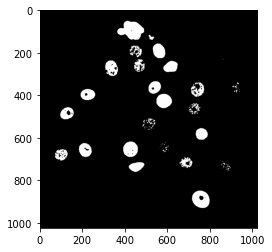

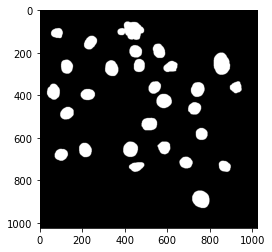

In [253]:
# Good examples for report - N2DH-GOWT1

figure()
imshow(img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(otsu_img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(median_stretch_img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(otsu_median_stretch_img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(binary_gt_N2DH_GOWT1_6 , 'gray')

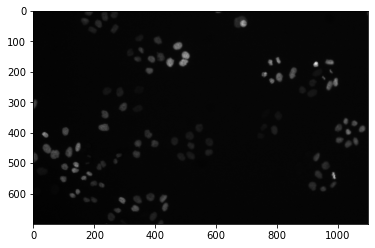

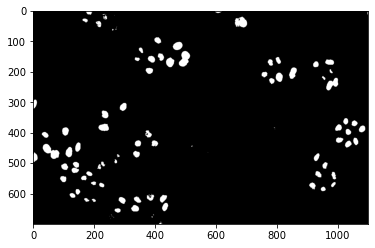

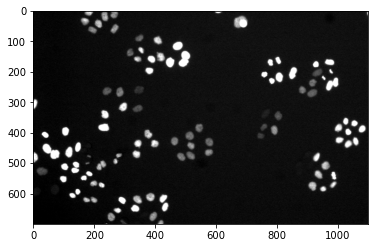

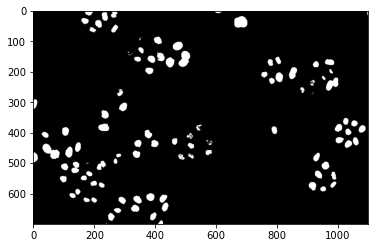

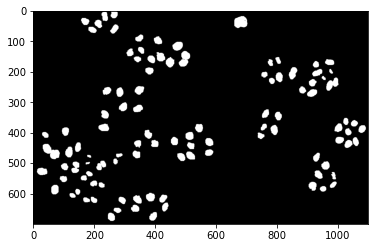

In [254]:
# Good examples for report - N2DL-HeLa

figure()
imshow(img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(stretch_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_stretch_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(binary_gt_N2DL_HeLa_2 , 'gray')

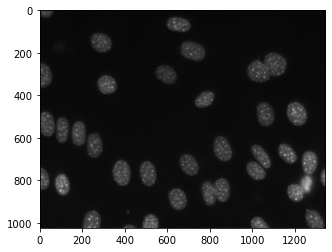

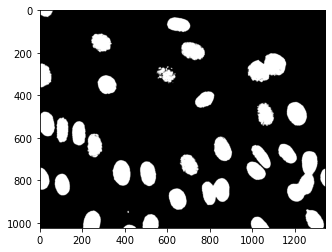

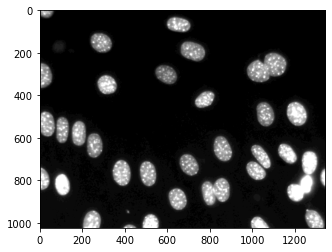

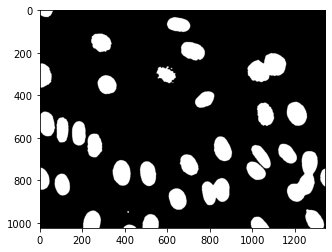

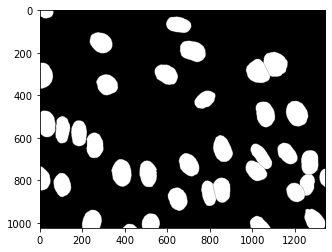

In [255]:
# Good examples for report - NIH3T3

figure()
imshow(img_NIH3T3_1 , 'gray')

figure()
imshow(otsu_img_NIH3T3_1 , 'gray')

figure()
imshow(median_stretch_img_NIH3T3_1 , 'gray')

figure()
imshow(otsu_median_stretch_img_NIH3T3_1 , 'gray')

figure()
imshow(gt_NIH3T3_1 , 'gray')

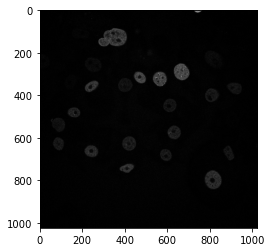

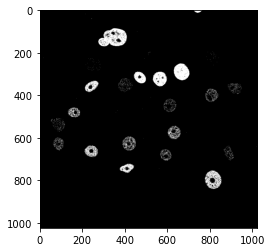

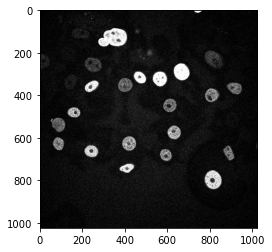

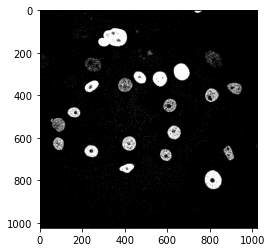

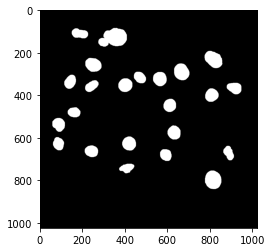

In [256]:
# Bad examples for report - N2DH-GOWT1

figure()
imshow(img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(otsu_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(stretch_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(otsu_stretch_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(binary_gt_N2DH_GOWT1_1 , 'gray')

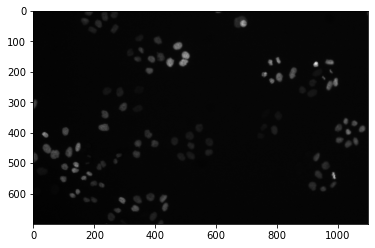

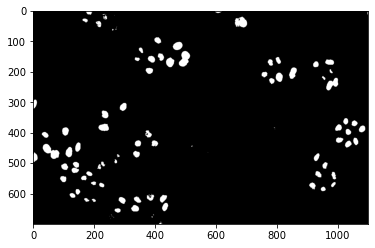

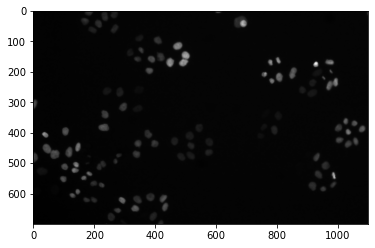

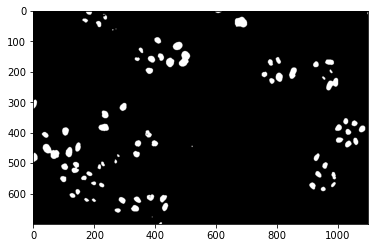

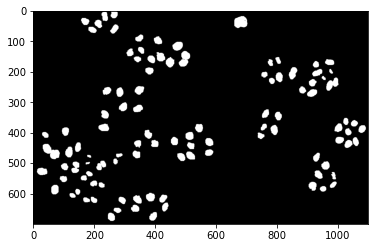

In [257]:
# Bad examples for report - N2DL-HeLa

figure()
imshow(img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(median_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_median_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(binary_gt_N2DL_HeLa_2 , 'gray')

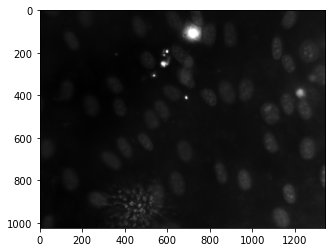

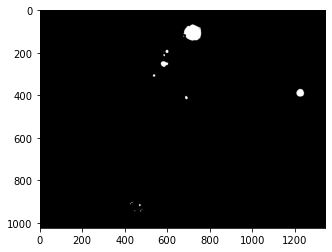

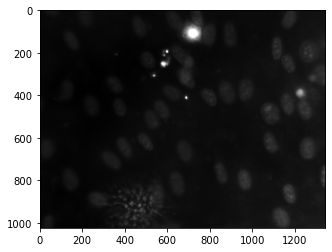

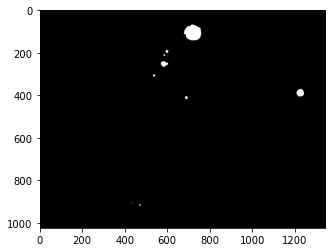

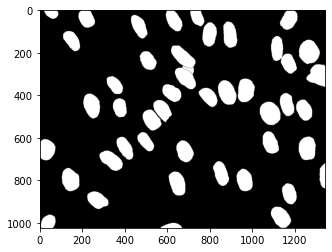

In [258]:
# Bad examples for report - NIH3T3

figure()
imshow(img_NIH3T3_11 , 'gray')

figure()
imshow(otsu_img_NIH3T3_11 , 'gray')

figure()
imshow(median_img_NIH3T3_11 , 'gray')

figure()
imshow(otsu_median_img_NIH3T3_11 , 'gray')

figure()
imshow(gt_NIH3T3_11 , 'gray')